# Parkway Project Use Case 1: Write Off Cases Prediction

## DATA PREPARATION

### Load Data

#### Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings(action='once')

#### Read data from file

In [2]:
filePath = '.\ParkwaySampleDataForProject_12_WithLabelNoFormula.xlsx'
df = pd.read_excel(filePath)
display(df.shape)

<>:1: DeprecationWarning: invalid escape sequence \P
C:\Users\HCAND\anaconda3\envs\psupr\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


(381210, 85)

### Exploratory Data Analysis

#### Explore data

In [3]:
info = []
for col in df.columns:
    non_null  = len(df) - np.sum(pd.isna(df[col]))
    num_unique = df[col].nunique()
    col_type = str(df[col].dtype)

    info.append([col, non_null, num_unique, col_type])

features_info = pd.DataFrame(info, columns = ['colName','non-null values', 'unique', 'dtype'])

display(features_info)
#features_info.to_csv('Info_List.csv')

,colName,non-null values,unique,dtype
0,INSTITUTION,381210,4,object
1,CASE_NUMBER,381210,381210,int64
2,TOTAL_PAID_AMT,381210,326907,float64
3,PAYER_CODE_1,381210,482,object
4,PAYER_NAME_1,381210,425,object
5,PAYER_1_PAID_AMT,381210,308341,float64
6,PAYER_CODE_2,149318,378,object
7,PAYER_NAME_2,149318,329,object
8,PAYER_2_PAID_AMT,381210,117053,float64
9,PAYER_CODE_3,53205,230,object


In [5]:
# drop unnecessary columns
col_drop = ['PAYER_NAME_1', 'PAYER_NAME_2', 'PAYER_NAME_3', 'PAYER_NAME_4', 'PAYER_NAME_5', 'CASE_TYPE',
            'DISCHARGE_TYPE_DESC', 'DOCTOR_NAME', 'SPECIALTY_DESC','TOSP_STRING', 'TOSP_DESC1', 'TOSP_DESC2',
            'TOSP_DESC3', 'TOSP_DESC4', 'DRG_DESC', 'PAYER_CODE1_V', 'PAYER_NAME1_V', 'PAYER_CODE2_V',
            'PAYER_NAME2_V', 'PAYER_CODE3_V', 'PAYER_NAME3_V', 'PAYER_CODE4_V', 'PAYER_NAME4_V',
            'PACKAGE_DESC', 'PACKAGE_DESC1', 'PACKAGE_DESC2','ICDCODE_STRING', 'PACKAGE_CODE',
            'PACKAGE_PRICE', 'PACKAGE_EXCL', 'PACKAGE_ADJ', 'PACKAGE_CODE1', 'PACKAGE_CODE2','WRITE_OFF',
            'PCT_WRITE_OFF','PROF_FEE','TOTAL_FEES','TOTAL_PAID_AMT','PAYER_1_PAID_AMT','PAYER_2_PAID_AMT',
            'PAYER_3_PAID_AMT','PAYER_4_PAID_AMT','PAYER_5_PAID_AMT','PATIENT_SID','PATIENT_NUMBER','LANGUAGE','DRG_CODE']
df1 =  df.drop(col_drop, axis=1)

# convert dates
col_dt = df1.select_dtypes(include=np.datetime64).columns
for col in col_dt:
    df1[col+'_year'] = df1[col].dt.year
    df1[col+'_month'] = df1[col].dt.month
    df1[col+'_day'] = df1[col].dt.day
df1 =  df1.drop(col_dt, axis=1)

# convert objects to factors
col_obj = df1.select_dtypes(include=np.object).columns
for col in col_obj:
    df1[col] = pd.factorize(df1[col])[0] +1

print(df1.info())


# Checking df1 columns
info = []
for col in df1.columns:
    non_null  = len(df1) - np.sum(pd.isna(df1[col]))
    num_unique = df1[col].nunique()
    col_type = str(df1[col].dtype)

    info.append([col, non_null, num_unique, col_type])

features_info = pd.DataFrame(info, columns = ['colName','non-null values', 'unique', 'dtype'])

display(features_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381210 entries, 0 to 381209
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INSTITUTION          381210 non-null  int64  
 1   CASE_NUMBER          381210 non-null  int64  
 2   PAYER_CODE_1         381210 non-null  int64  
 3   PAYER_CODE_2         381210 non-null  int64  
 4   PAYER_CODE_3         381210 non-null  int64  
 5   PAYER_CODE_4         381210 non-null  int64  
 6   PAYER_CODE_5         381210 non-null  int64  
 7   BED_TYPE             381210 non-null  int64  
 8   REFERRAL_TYPE        381210 non-null  int64  
 9   TREATMENT_CATEGORY   381210 non-null  int64  
 10  ADMISSION_TYPE       381210 non-null  int64  
 11  DISCHARGE_TYPE       381210 non-null  int64  
 12  LOS_DAYS             381210 non-null  int64  
 13  DOCTOR_CODE          381210 non-null  int64  
 14  SPECIALTY_CODE       381173 non-null  float64
 15  SPECIALTY_GRP    

,colName,non-null values,unique,dtype
0,INSTITUTION,381210,4,int64
1,CASE_NUMBER,381210,381210,int64
2,PAYER_CODE_1,381210,482,int64
3,PAYER_CODE_2,381210,379,int64
4,PAYER_CODE_3,381210,231,int64
5,PAYER_CODE_4,381210,90,int64
6,PAYER_CODE_5,381210,22,int64
7,BED_TYPE,381210,10,int64
8,REFERRAL_TYPE,381210,51,int64
9,TREATMENT_CATEGORY,381210,60,int64


In [6]:
print(df['CASE_NUMBER'].nunique())

381210


In [7]:
print(df[df.duplicated(subset=['CASE_NUMBER'], keep=False)])

Empty DataFrame
Columns: [INSTITUTION, CASE_NUMBER, TOTAL_PAID_AMT, PAYER_CODE_1, PAYER_NAME_1, PAYER_1_PAID_AMT, PAYER_CODE_2, PAYER_NAME_2, PAYER_2_PAID_AMT, PAYER_CODE_3, PAYER_NAME_3, PAYER_3_PAID_AMT, PAYER_CODE_4, PAYER_NAME_4, PAYER_4_PAID_AMT, PAYER_CODE_5, PAYER_NAME_5, PAYER_5_PAID_AMT, CASE_TYPE, BED_TYPE, REFERRAL_TYPE, TREATMENT_CATEGORY, ADMISSION_DTE, ADMISSION_TYPE, DISCHARGE_DTE, DISCHARGE_TYPE, DISCHARGE_TYPE_DESC, LOS_DAYS, DOCTOR_CODE, DOCTOR_NAME, SPECIALTY_CODE, SPECIALTY_DESC, SPECIALTY_GRP, TOSP_COUNT, TOSP_STRING, TOSP_CODE1, TOSP_CODE2, TOSP_CODE3, TOSP_CODE4, TOSP_DESC1, TOSP_DESC2, TOSP_DESC3, TOSP_DESC4, NATIONALITY, RESID_CTY, RESID_POSTALCODE, DOB, NONRESID_FLAG, PATIENT_SID, PATIENT_NUMBER, GENDER, DECEASED_FLAG, MARITAL_STATUS, RELIGION, LANGUAGE, VIP_FLAG, RACE, DRG_CODE, DRG_DESC, PAYER_CODE1_V, PAYER_NAME1_V, PAYER_CODE2_V, PAYER_NAME2_V, PAYER_CODE3_V, PAYER_NAME3_V, PAYER_CODE4_V, PAYER_NAME4_V, PACKAGE_CODE, PACKAGE_PRICE, PACKAGE_EXCL, PACKAGE_AD

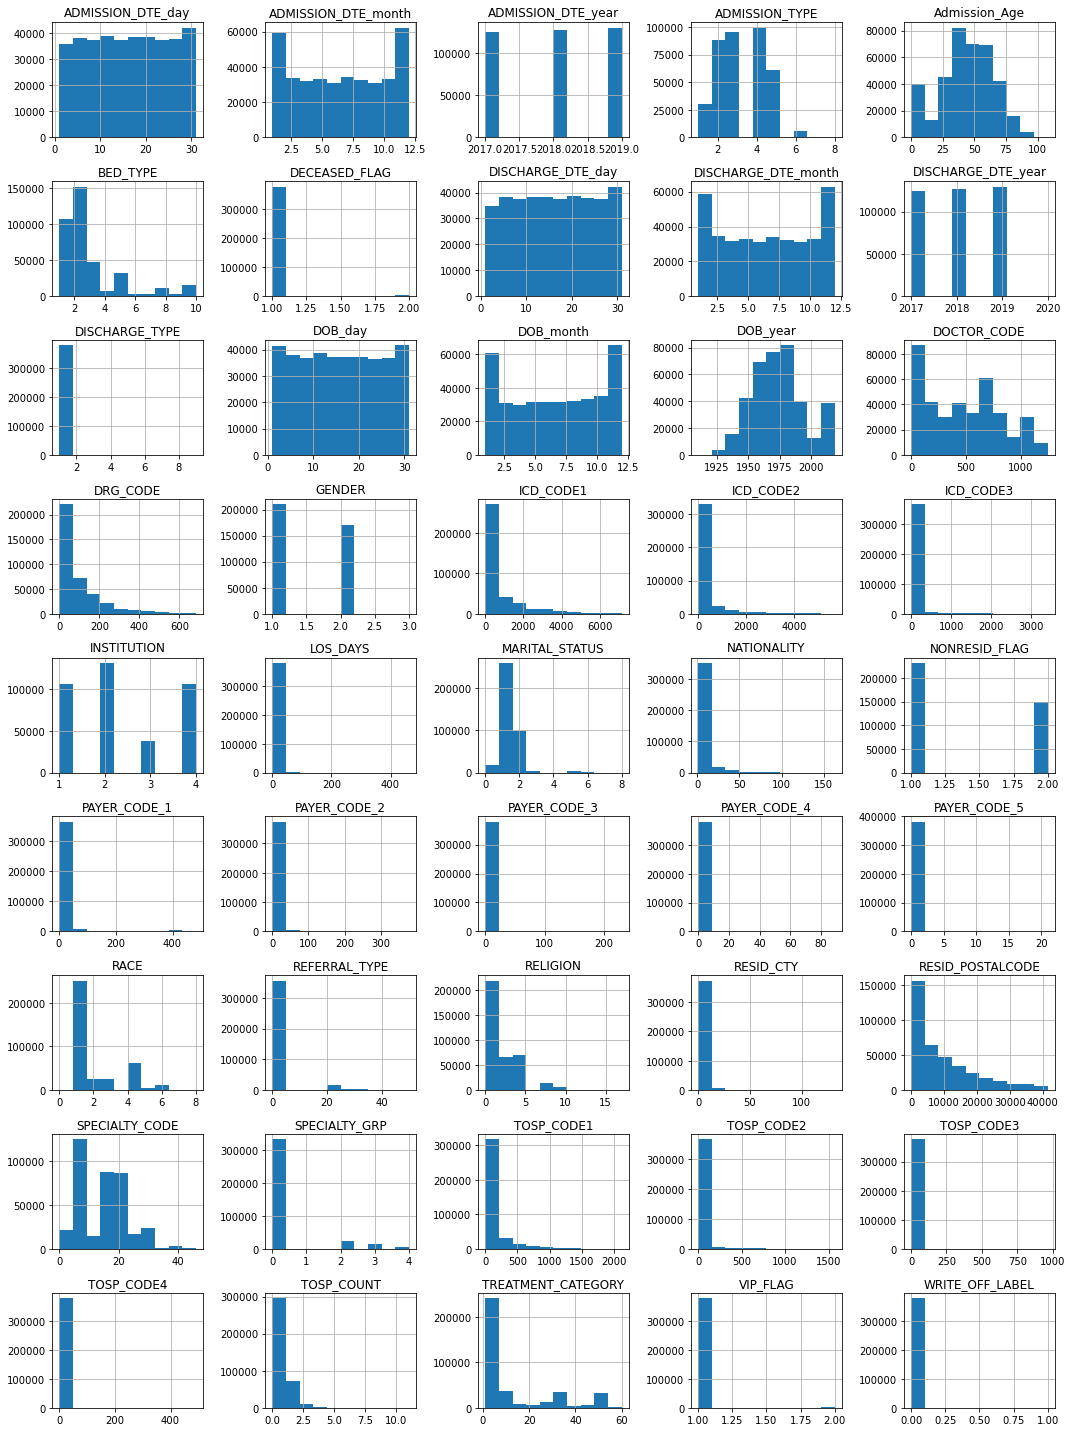

In [90]:
df1.hist(figsize=(15,20), layout=(-1,5))
plt.tight_layout()
plt.show()

In [8]:
print(df1)

        INSTITUTION  CASE_NUMBER  PAYER_CODE_1  PAYER_CODE_2  PAYER_CODE_3  \
0                 1   1014019571             1             1             1   
1                 1   1014022893             1             0             0   
2                 1   1014060798             2             2             0   
3                 1   1015067071             1             1             0   
4                 1   1015073219             1             0             0   
...             ...          ...           ...           ...           ...   
381205            4   4019117108            16             0             0   
381206            4   4019117110             4             0             0   
381207            4   4019117113             1             1             8   
381208            4   4019117132             8             0             0   
381209            4   4019117134             4             0             0   

        PAYER_CODE_4  PAYER_CODE_5  BED_TYPE  REFERRAL_TYPE  \


### Feature Engineering

In [9]:
# Aggregate 'Admission_Age' using 'ADMISSION_DTE', 'DOB'
print(df1['DOB_year'].head())
df1['Admission_Age'] = df1['ADMISSION_DTE_year']-df1['DOB_year']
print(df1[['ADMISSION_DTE_year', 'DOB_year','Admission_Age']])

0    1980
1    1951
2    1948
3    1980
4    1972
Name: DOB_year, dtype: int64
        ADMISSION_DTE_year  DOB_year  Admission_Age
0                     2018      1980             38
1                     2018      1951             67
2                     2018      1948             70
3                     2017      1980             37
4                     2019      1972             47
...                    ...       ...            ...
381205                2019      1964             55
381206                2019      1982             37
381207                2019      1937             82
381208                2019      1964             55
381209                2019      2015              4

[381210 rows x 3 columns]


### Split Data to Training and Test

In [12]:
type(df1)

pandas.core.frame.DataFrame

In [13]:
df1.shape

(381210, 45)

In [14]:
df1.index = df1.CASE_NUMBER
df1 =  df1.drop(['CASE_NUMBER'], axis=1)

In [15]:
# Fill NAN with zeros
df1 = df1.fillna(0)

In [16]:
print(df1)

             INSTITUTION  PAYER_CODE_1  PAYER_CODE_2  PAYER_CODE_3  \
CASE_NUMBER                                                          
1014019571             1             1             1             1   
1014022893             1             1             0             0   
1014060798             1             2             2             0   
1015067071             1             1             1             0   
1015073219             1             1             0             0   
...                  ...           ...           ...           ...   
4019117108             4            16             0             0   
4019117110             4             4             0             0   
4019117113             4             1             1             8   
4019117132             4             8             0             0   
4019117134             4             4             0             0   

             PAYER_CODE_4  PAYER_CODE_5  BED_TYPE  REFERRAL_TYPE  \
CASE_NUMBER          

In [17]:
df1.to_csv('PARKWAY_PROCESSED_4_NAN.csv')

In [18]:
X = df1.drop("WRITE_OFF_LABEL",axis = 1)
y = df1.WRITE_OFF_LABEL

In [19]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [20]:
X.head()

,INSTITUTION,PAYER_CODE_1,PAYER_CODE_2,PAYER_CODE_3,PAYER_CODE_4,PAYER_CODE_5,BED_TYPE,REFERRAL_TYPE,TREATMENT_CATEGORY,ADMISSION_TYPE,...,ADMISSION_DTE_year,ADMISSION_DTE_month,ADMISSION_DTE_day,DISCHARGE_DTE_year,DISCHARGE_DTE_month,DISCHARGE_DTE_day,DOB_year,DOB_month,DOB_day,Admission_Age
CASE_NUMBER,,,,,,,,,,,,,,,,,,,,,
1014019571,1,1,1,1,0,0,1,1,1,1,...,2018,5,1,2018,5,4,1980,12,25,38
1014022893,1,1,0,0,0,0,2,1,2,2,...,2018,4,24,2018,4,24,1951,10,26,67
1014060798,1,2,2,0,0,0,1,1,1,3,...,2018,4,11,2018,4,12,1948,6,6,70
1015067071,1,1,1,0,0,0,3,1,3,4,...,2017,1,26,2017,1,27,1980,1,23,37
1015073219,1,1,0,0,0,0,2,1,4,2,...,2019,9,26,2019,9,26,1972,5,25,47


In [21]:
y.head()

CASE_NUMBER
1014019571    0
1014022893    0
1014060798    0
1015067071    0
1015073219    0
Name: WRITE_OFF_LABEL, dtype: int64

In [22]:
y_train.head()

CASE_NUMBER
4017062839    0
1019051639    0
4018041857    0
1017016510    0
2019044524    0
Name: WRITE_OFF_LABEL, dtype: int64

In [23]:
print('X_train.shape is ', X_train.shape)
print('X_test.shape is ', X_test.shape)
print('y_train.shape is ', y_train.shape)
print('y_test.shape is ', y_test.shape)

X_train.shape is  (254140, 43)
X_test.shape is  (127070, 43)
y_train.shape is  (254140,)
y_test.shape is  (127070,)


In [24]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test) 

In [25]:
#type(X_train)
np.where(np.isnan(X_train))

(array([], dtype=int64), array([], dtype=int64))

## DATA PREPARATION WITH SMOTE (Synthetic Minority Over Sampling Technique)
## UNSCALED FOR DECISION TREE MODELS

In [26]:
# Created few instances of smote here
# sm_ss_10 = normal smote with default sampling strategy = 1.0 -> this will create synthetic data for minority class such that the
#   number of samples for minority class equals with samples for majority class
# sm_ss_01 = smote with sampling strategy = 0.1
# sm_ss_02 = smote with sampling strategy = 0.2
# sm_ss_03 = smote with sampling strategy = 0.3 etc
# this will create synthetic data for minority class such that the number of samples for minority class = 0.1,0.2, 0.3 or 10%,20%,30% of the number of samples from majority class
import imblearn
from imblearn.over_sampling import SMOTE
print(imblearn.__version__)

sm_ss_01 = SMOTE(random_state=55,sampling_strategy=0.1)
sm_ss_02 = SMOTE(random_state=55,sampling_strategy=0.2)
sm_ss_03 = SMOTE(random_state=55,sampling_strategy=0.3)
sm_ss_04 = SMOTE(random_state=55,sampling_strategy=0.4)
sm_ss_05 = SMOTE(random_state=55,sampling_strategy=0.5)
sm_ss_06 = SMOTE(random_state=55,sampling_strategy=0.6)
sm_ss_07 = SMOTE(random_state=55,sampling_strategy=0.7)
sm_ss_08 = SMOTE(random_state=55,sampling_strategy=0.8)
sm_ss_09 = SMOTE(random_state=55,sampling_strategy=0.9)
sm_ss_10 = SMOTE(random_state=55) # default sampling strategy is 1.0


# Preparing Unscaled Training Data with Smote
X_train_unscaled_ss_01, y_train_unscaled_ss_01 = sm_ss_01.fit_sample(X_train,y_train)
X_train_unscaled_ss_02, y_train_unscaled_ss_02 = sm_ss_02.fit_sample(X_train,y_train)
X_train_unscaled_ss_03, y_train_unscaled_ss_03 = sm_ss_03.fit_sample(X_train,y_train)
X_train_unscaled_ss_04, y_train_unscaled_ss_04 = sm_ss_04.fit_sample(X_train,y_train)
X_train_unscaled_ss_05, y_train_unscaled_ss_05 = sm_ss_05.fit_sample(X_train,y_train)
X_train_unscaled_ss_06, y_train_unscaled_ss_06 = sm_ss_06.fit_sample(X_train,y_train)
X_train_unscaled_ss_07, y_train_unscaled_ss_07 = sm_ss_07.fit_sample(X_train,y_train)
X_train_unscaled_ss_08, y_train_unscaled_ss_08 = sm_ss_08.fit_sample(X_train,y_train)
X_train_unscaled_ss_09, y_train_unscaled_ss_09 = sm_ss_09.fit_sample(X_train,y_train)
X_train_unscaled_ss_10, y_train_unscaled_ss_10 = sm_ss_10.fit_sample(X_train,y_train)

# Checking Data Shape
print('X_train.shape is ', X_train.shape)
print('X_train_unscaled_ss_01.shape is ', X_train_unscaled_ss_01.shape)
print('y_train_unscaled_ss_01.shape is ', y_train_unscaled_ss_01.shape)
print('X_train_unscaled_ss_02.shape is ', X_train_unscaled_ss_02.shape)
print('y_train_unscaled_ss_02.shape is ', y_train_unscaled_ss_02.shape)
print('X_train_unscaled_ss_03.shape is ', X_train_unscaled_ss_03.shape)
print('y_train_unscaled_ss_03.shape is ', y_train_unscaled_ss_03.shape)
print('X_train_unscaled_ss_04.shape is ', X_train_unscaled_ss_04.shape)
print('y_train_unscaled_ss_04.shape is ', y_train_unscaled_ss_04.shape)
print('X_train_unscaled_ss_05.shape is ', X_train_unscaled_ss_05.shape)
print('y_train_unscaled_ss_05.shape is ', y_train_unscaled_ss_05.shape)
print('X_train_unscaled_ss_06.shape is ', X_train_unscaled_ss_06.shape)
print('y_train_unscaled_ss_06.shape is ', y_train_unscaled_ss_06.shape)
print('X_train_unscaled_ss_07.shape is ', X_train_unscaled_ss_07.shape)
print('y_train_unscaled_ss_07.shape is ', y_train_unscaled_ss_07.shape)
print('X_train_unscaled_ss_08.shape is ', X_train_unscaled_ss_08.shape)
print('y_train_unscaled_ss_08.shape is ', y_train_unscaled_ss_08.shape)
print('X_train_unscaled_ss_09.shape is ', X_train_unscaled_ss_09.shape)
print('y_train_unscaled_ss_09.shape is ', y_train_unscaled_ss_09.shape)
print('X_train_unscaled_ss_10.shape is ', X_train_unscaled_ss_10.shape)
print('y_train_unscaled_ss_10.shape is ', y_train_unscaled_ss_10.shape)

print('X_test.shape is ', X_test.shape)
print('y_test.shape is ', y_test.shape)



0.7.0
X_train.shape is  (254140, 43)
X_train_unscaled_ss_01.shape is  (279121, 43)
y_train_unscaled_ss_01.shape is  (279121,)
X_train_unscaled_ss_02.shape is  (304496, 43)
y_train_unscaled_ss_02.shape is  (304496,)
X_train_unscaled_ss_03.shape is  (329871, 43)
y_train_unscaled_ss_03.shape is  (329871,)
X_train_unscaled_ss_04.shape is  (355245, 43)
y_train_unscaled_ss_04.shape is  (355245,)
X_train_unscaled_ss_05.shape is  (380620, 43)
y_train_unscaled_ss_05.shape is  (380620,)
X_train_unscaled_ss_06.shape is  (405995, 43)
y_train_unscaled_ss_06.shape is  (405995,)
X_train_unscaled_ss_07.shape is  (431369, 43)
y_train_unscaled_ss_07.shape is  (431369,)
X_train_unscaled_ss_08.shape is  (456744, 43)
y_train_unscaled_ss_08.shape is  (456744,)
X_train_unscaled_ss_09.shape is  (482119, 43)
y_train_unscaled_ss_09.shape is  (482119,)
X_train_unscaled_ss_10.shape is  (507494, 43)
y_train_unscaled_ss_10.shape is  (507494,)
X_test.shape is  (127070, 43)
y_test.shape is  (127070,)


In [27]:
# Checking Unique Values in y_train
unique, count = np.unique(y_train, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
print('y_train unique values ',y_train_dict_value_count)

unique, count = np.unique(y_train_unscaled_ss_01, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
print('y_train_unscaled_ss_01 unique values ',y_train_dict_value_count)

unique, count = np.unique(y_train_unscaled_ss_02, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
print('y_train_unscaled_ss_02 unique values ',y_train_dict_value_count)

unique, count = np.unique(y_train_unscaled_ss_03, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
print('y_train_unscaled_ss_03 unique values ',y_train_dict_value_count)

unique, count = np.unique(y_train_unscaled_ss_04, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
print('y_train_unscaled_ss_04 unique values ',y_train_dict_value_count)

unique, count = np.unique(y_train_unscaled_ss_05, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
print('y_train_unscaled_ss_05 unique values ',y_train_dict_value_count)

unique, count = np.unique(y_train_unscaled_ss_06, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
print('y_train_unscaled_ss_06 unique values ',y_train_dict_value_count)

unique, count = np.unique(y_train_unscaled_ss_07, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
print('y_train_unscaled_ss_07 unique values ',y_train_dict_value_count)

unique, count = np.unique(y_train_unscaled_ss_08, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
print('y_train_unscaled_ss_08 unique values ',y_train_dict_value_count)

unique, count = np.unique(y_train_unscaled_ss_09, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
print('y_train_unscaled_ss_09 unique values ',y_train_dict_value_count)

unique, count = np.unique(y_train_unscaled_ss_10, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
print('y_train_unscaled_ss_10 unique values ',y_train_dict_value_count)


y_train unique values  {0: 253747, 1: 393}
y_train_unscaled_ss_01 unique values  {0: 253747, 1: 25374}
y_train_unscaled_ss_02 unique values  {0: 253747, 1: 50749}
y_train_unscaled_ss_03 unique values  {0: 253747, 1: 76124}
y_train_unscaled_ss_04 unique values  {0: 253747, 1: 101498}
y_train_unscaled_ss_05 unique values  {0: 253747, 1: 126873}
y_train_unscaled_ss_06 unique values  {0: 253747, 1: 152248}
y_train_unscaled_ss_07 unique values  {0: 253747, 1: 177622}
y_train_unscaled_ss_08 unique values  {0: 253747, 1: 202997}
y_train_unscaled_ss_09 unique values  {0: 253747, 1: 228372}
y_train_unscaled_ss_10 unique values  {0: 253747, 1: 253747}


## DECISION TREE

### Decision Tree WITHOUT SMOTE

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.997


In [29]:
y_pred = dt.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[126639    235]
 [   160     36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.13      0.18      0.15       196

    accuracy                           1.00    127070
   macro avg       0.57      0.59      0.58    127070
weighted avg       1.00      1.00      1.00    127070



In [31]:
#DT visualizatin method 1

from sklearn.tree import export_graphviz

dotfile = open("dt_unscaled_NoSMOTE.dot", 'w')

export_graphviz(dt, out_file=dotfile,feature_names = X.columns,class_names=['0','1'])
dotfile.close()

In [32]:
#DT visualizatin method 2
# need to install Graphviz first https://graphviz.gitlab.io/_pages/Download/Download_windows.html
from sklearn.tree import export_graphviz
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

export_graphviz(dt, out_file='tree.dot', feature_names=X.columns,class_names=['0','1'])
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'ParkwayWriteOff_Dectree_Unscaled_NoSmote.png', '-Gdpi=600'])

# Display in jupyter notebook
#from IPython.display import Image
#Image(filename = 'ParkwayWriteOff_tree.png')

0

Accuracy Score for DT = 0.9968914771385851


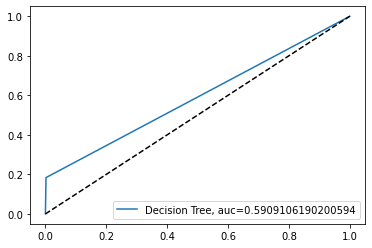

In [35]:
from sklearn import metrics
y_pred_dt = dt.predict(X_test)
print("Accuracy Score for DT =", metrics.accuracy_score(y_test, y_pred_dt))
fpr_dt, tpr_dt, _ = metrics.roc_curve(y_test,  y_pred_dt)
auc_dt = metrics.roc_auc_score(y_test, y_pred_dt)
#HC: Plot ROC for Decision Tree dt
plt.plot(fpr_dt,tpr_dt,label="Decision Tree, auc="+str(auc_dt))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.show()

Feature: 0, INSTITUTION, Score: 0.01934
Feature: 1, PAYER_CODE_1, Score: 0.03681
Feature: 2, PAYER_CODE_2, Score: 0.02216
Feature: 3, PAYER_CODE_3, Score: 0.01535
Feature: 4, PAYER_CODE_4, Score: 0.00904
Feature: 5, PAYER_CODE_5, Score: 0.00111
Feature: 6, BED_TYPE, Score: 0.01119
Feature: 7, REFERRAL_TYPE, Score: 0.00796
Feature: 8, TREATMENT_CATEGORY, Score: 0.01098
Feature: 9, ADMISSION_TYPE, Score: 0.00686
Feature: 10, DISCHARGE_TYPE, Score: 0.01140
Feature: 11, LOS_DAYS, Score: 0.12961
Feature: 12, DOCTOR_CODE, Score: 0.05360
Feature: 13, SPECIALTY_CODE, Score: 0.02632
Feature: 14, SPECIALTY_GRP, Score: 0.00703
Feature: 15, TOSP_COUNT, Score: 0.00703
Feature: 16, TOSP_CODE1, Score: 0.02049
Feature: 17, TOSP_CODE2, Score: 0.00688
Feature: 18, TOSP_CODE3, Score: 0.00841
Feature: 19, TOSP_CODE4, Score: 0.00265
Feature: 20, NATIONALITY, Score: 0.13238
Feature: 21, RESID_CTY, Score: 0.00187
Feature: 22, RESID_POSTALCODE, Score: 0.04216
Feature: 23, NONRESID_FLAG, Score: 0.00065
Feature

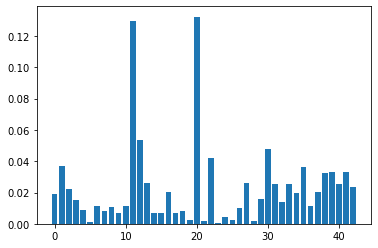

{'INSTITUTION': 0.01933654296793789,
 'PAYER_CODE_1': 0.036814886884121475,
 'PAYER_CODE_2': 0.022159918425252938,
 'PAYER_CODE_3': 0.01535438009579856,
 'PAYER_CODE_4': 0.009043561558009535,
 'PAYER_CODE_5': 0.0011073723244204626,
 'BED_TYPE': 0.011186677843464447,
 'REFERRAL_TYPE': 0.00796318485209775,
 'TREATMENT_CATEGORY': 0.010980409048713727,
 'ADMISSION_TYPE': 0.0068584024935060715,
 'DISCHARGE_TYPE': 0.011399908654919988,
 'LOS_DAYS': 0.12961352537703144,
 'DOCTOR_CODE': 0.05359913820407048,
 'SPECIALTY_CODE': 0.02631911443613569,
 'SPECIALTY_GRP': 0.007026431733646504,
 'TOSP_COUNT': 0.0070255766966710095,
 'TOSP_CODE1': 0.0204855328935143,
 'TOSP_CODE2': 0.0068755142450453305,
 'TOSP_CODE3': 0.00840649983265432,
 'TOSP_CODE4': 0.0026539920639506616,
 'NATIONALITY': 0.1323751781499683,
 'RESID_CTY': 0.0018662577832660278,
 'RESID_POSTALCODE': 0.042158441532338435,
 'NONRESID_FLAG': 0.000650361326532613,
 'GENDER': 0.004373843409589594,
 'DECEASED_FLAG': 0.002398470568087725,
 

In [36]:
# Method 1: with bar chart
from matplotlib import pyplot
# get importance
importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, %s, Score: %.5f' % (i,df1.columns[i],v))
# plot feature importance
print()
print('Below is the barchart for each feature\'s value')
pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.bar([diabetes_data.columns[x] for x in range(len(importance))], importance)
pyplot.show()

#Method 2: Simply showing numbers
feature_importances = dict(zip(df1.columns, dt.feature_importances_))
feature_importances

### Decision Tree WITH SMOTE

#### Decision Tree WITH SMOTE SS = 0.1

In [37]:
dt.fit(X_train_unscaled_ss_01, y_train_unscaled_ss_01)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train_unscaled_ss_01, y_train_unscaled_ss_01)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Accuracy on training set: 1.000
Accuracy on test set: 0.995
[[126438    436]
 [   162     34]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.07      0.17      0.10       196

    accuracy                           1.00    127070
   macro avg       0.54      0.59      0.55    127070
weighted avg       1.00      1.00      1.00    127070



#### Decision Tree WITH SMOTE SS = 0.2

In [38]:
dt.fit(X_train_unscaled_ss_02, y_train_unscaled_ss_02)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train_unscaled_ss_02, y_train_unscaled_ss_02)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Accuracy on training set: 1.000
Accuracy on test set: 0.995
[[126425    449]
 [   157     39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.08      0.20      0.11       196

    accuracy                           1.00    127070
   macro avg       0.54      0.60      0.56    127070
weighted avg       1.00      1.00      1.00    127070



#### Decision Tree WITH SMOTE SS = 0.3

In [39]:
dt.fit(X_train_unscaled_ss_03, y_train_unscaled_ss_03)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train_unscaled_ss_03, y_train_unscaled_ss_03)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Accuracy on training set: 1.000
Accuracy on test set: 0.995
[[126400    474]
 [   161     35]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.07      0.18      0.10       196

    accuracy                           1.00    127070
   macro avg       0.53      0.59      0.55    127070
weighted avg       1.00      1.00      1.00    127070



#### Decision Tree WITH SMOTE SS = 0.4

In [40]:
dt.fit(X_train_unscaled_ss_04, y_train_unscaled_ss_04)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train_unscaled_ss_04, y_train_unscaled_ss_04)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Accuracy on training set: 1.000
Accuracy on test set: 0.995
[[126445    429]
 [   163     33]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.07      0.17      0.10       196

    accuracy                           1.00    127070
   macro avg       0.54      0.58      0.55    127070
weighted avg       1.00      1.00      1.00    127070



#### Decision Tree WITH SMOTE SS = 0.5

In [41]:
dt.fit(X_train_unscaled_ss_05, y_train_unscaled_ss_05)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train_unscaled_ss_05, y_train_unscaled_ss_05)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Accuracy on training set: 1.000
Accuracy on test set: 0.995
[[126388    486]
 [   168     28]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.05      0.14      0.08       196

    accuracy                           0.99    127070
   macro avg       0.53      0.57      0.54    127070
weighted avg       1.00      0.99      1.00    127070



#### Decision Tree WITH SMOTE SS = 0.6

In [42]:
dt.fit(X_train_unscaled_ss_06, y_train_unscaled_ss_06)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train_unscaled_ss_06, y_train_unscaled_ss_06)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Accuracy on training set: 1.000
Accuracy on test set: 0.995
[[126457    417]
 [   165     31]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.07      0.16      0.10       196

    accuracy                           1.00    127070
   macro avg       0.53      0.58      0.55    127070
weighted avg       1.00      1.00      1.00    127070



#### Decision Tree WITH SMOTE SS = 0.7

In [43]:
dt.fit(X_train_unscaled_ss_07, y_train_unscaled_ss_07)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train_unscaled_ss_07, y_train_unscaled_ss_07)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Accuracy on training set: 1.000
Accuracy on test set: 0.995
[[126446    428]
 [   161     35]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.08      0.18      0.11       196

    accuracy                           1.00    127070
   macro avg       0.54      0.59      0.55    127070
weighted avg       1.00      1.00      1.00    127070



#### Decision Tree WITH SMOTE SS = 0.8

In [44]:
dt.fit(X_train_unscaled_ss_08, y_train_unscaled_ss_08)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train_unscaled_ss_08, y_train_unscaled_ss_08)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Accuracy on training set: 1.000
Accuracy on test set: 0.995
[[126433    441]
 [   165     31]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.07      0.16      0.09       196

    accuracy                           1.00    127070
   macro avg       0.53      0.58      0.55    127070
weighted avg       1.00      1.00      1.00    127070



#### Decision Tree WITH SMOTE SS = 0.9

In [45]:
dt.fit(X_train_unscaled_ss_09, y_train_unscaled_ss_09)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train_unscaled_ss_09, y_train_unscaled_ss_09)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Accuracy on training set: 1.000
Accuracy on test set: 0.995
[[126418    456]
 [   168     28]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.06      0.14      0.08       196

    accuracy                           1.00    127070
   macro avg       0.53      0.57      0.54    127070
weighted avg       1.00      1.00      1.00    127070



#### Decision Tree WITH SMOTE SS = 1.0

In [46]:
dt.fit(X_train_unscaled_ss_10, y_train_unscaled_ss_10)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train_unscaled_ss_10, y_train_unscaled_ss_10)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Accuracy on training set: 1.000
Accuracy on test set: 0.995
[[126427    447]
 [   167     29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.06      0.15      0.09       196

    accuracy                           1.00    127070
   macro avg       0.53      0.57      0.54    127070
weighted avg       1.00      1.00      1.00    127070



## DATA PREPARATION WITH SMOTE (Synthetic Minority Over Sampling Technique)
## SCALED FOR OTHER MODELS

In [47]:
sm_ss_01 = SMOTE(random_state=55,sampling_strategy=0.1)
sm_ss_02 = SMOTE(random_state=55,sampling_strategy=0.2)
sm_ss_03 = SMOTE(random_state=55,sampling_strategy=0.3)
sm_ss_04 = SMOTE(random_state=55,sampling_strategy=0.4)
sm_ss_05 = SMOTE(random_state=55,sampling_strategy=0.5)
sm_ss_06 = SMOTE(random_state=55,sampling_strategy=0.6)
sm_ss_07 = SMOTE(random_state=55,sampling_strategy=0.7)
sm_ss_08 = SMOTE(random_state=55,sampling_strategy=0.8)
sm_ss_09 = SMOTE(random_state=55,sampling_strategy=0.9)
sm_ss_10 = SMOTE(random_state=55) # default sampling strategy is 1.0


# Preparing Scaled Training Data with Smote
X_train_scaled_ss_01, y_train_scaled_ss_01 = sm_ss_01.fit_sample(X_train_scaled,y_train)
X_train_scaled_ss_02, y_train_scaled_ss_02 = sm_ss_02.fit_sample(X_train_scaled,y_train)
X_train_scaled_ss_03, y_train_scaled_ss_03 = sm_ss_03.fit_sample(X_train_scaled,y_train)
X_train_scaled_ss_04, y_train_scaled_ss_04 = sm_ss_04.fit_sample(X_train_scaled,y_train)
X_train_scaled_ss_05, y_train_scaled_ss_05 = sm_ss_05.fit_sample(X_train_scaled,y_train)
X_train_scaled_ss_06, y_train_scaled_ss_06 = sm_ss_06.fit_sample(X_train_scaled,y_train)
X_train_scaled_ss_07, y_train_scaled_ss_07 = sm_ss_07.fit_sample(X_train_scaled,y_train)
X_train_scaled_ss_08, y_train_scaled_ss_08 = sm_ss_08.fit_sample(X_train_scaled,y_train)
X_train_scaled_ss_09, y_train_scaled_ss_09 = sm_ss_09.fit_sample(X_train_scaled,y_train)
X_train_scaled_ss_10, y_train_scaled_ss_10 = sm_ss_10.fit_sample(X_train_scaled,y_train)

# Checking Data Shape
print('X_train.shape is ', X_train.shape)
print('X_train_scaled_ss_01.shape is ', X_train_scaled_ss_01.shape)
print('y_train_scaled_ss_01.shape is ', y_train_scaled_ss_01.shape)
print('X_train_scaled_ss_02.shape is ', X_train_scaled_ss_02.shape)
print('y_train_scaled_ss_02.shape is ', y_train_scaled_ss_02.shape)
print('X_train_scaled_ss_03.shape is ', X_train_scaled_ss_03.shape)
print('y_train_scaled_ss_03.shape is ', y_train_scaled_ss_03.shape)
print('X_train_scaled_ss_04.shape is ', X_train_scaled_ss_04.shape)
print('y_train_scaled_ss_04.shape is ', y_train_scaled_ss_04.shape)
print('X_train_scaled_ss_05.shape is ', X_train_scaled_ss_05.shape)
print('y_train_scaled_ss_05.shape is ', y_train_scaled_ss_05.shape)
print('X_train_scaled_ss_06.shape is ', X_train_scaled_ss_06.shape)
print('y_train_scaled_ss_06.shape is ', y_train_scaled_ss_06.shape)
print('X_train_scaled_ss_07.shape is ', X_train_scaled_ss_07.shape)
print('y_train_scaled_ss_07.shape is ', y_train_scaled_ss_07.shape)
print('X_train_scaled_ss_08.shape is ', X_train_scaled_ss_08.shape)
print('y_train_scaled_ss_08.shape is ', y_train_scaled_ss_08.shape)
print('X_train_scaled_ss_09.shape is ', X_train_scaled_ss_09.shape)
print('y_train_scaled_ss_09.shape is ', y_train_scaled_ss_09.shape)
print('X_train_scaled_ss_10.shape is ', X_train_scaled_ss_10.shape)
print('y_train_scaled_ss_10.shape is ', y_train_scaled_ss_10.shape)

print('X_test.shape is ', X_test.shape)
print('y_test.shape is ', y_test.shape)


X_train.shape is  (254140, 43)
X_train_scaled_ss_01.shape is  (279121, 43)
y_train_scaled_ss_01.shape is  (279121,)
X_train_scaled_ss_02.shape is  (304496, 43)
y_train_scaled_ss_02.shape is  (304496,)
X_train_scaled_ss_03.shape is  (329871, 43)
y_train_scaled_ss_03.shape is  (329871,)
X_train_scaled_ss_04.shape is  (355245, 43)
y_train_scaled_ss_04.shape is  (355245,)
X_train_scaled_ss_05.shape is  (380620, 43)
y_train_scaled_ss_05.shape is  (380620,)
X_train_scaled_ss_06.shape is  (405995, 43)
y_train_scaled_ss_06.shape is  (405995,)
X_train_scaled_ss_07.shape is  (431369, 43)
y_train_scaled_ss_07.shape is  (431369,)
X_train_scaled_ss_08.shape is  (456744, 43)
y_train_scaled_ss_08.shape is  (456744,)
X_train_scaled_ss_09.shape is  (482119, 43)
y_train_scaled_ss_09.shape is  (482119,)
X_train_scaled_ss_10.shape is  (507494, 43)
y_train_scaled_ss_10.shape is  (507494,)
X_test.shape is  (127070, 43)
y_test.shape is  (127070,)


In [48]:
# Checking Unique Values in y_train
unique, count = np.unique(y_train, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
print('y_train unique values ',y_train_dict_value_count)

unique, count = np.unique(y_train_scaled_ss_01, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
print('y_train_scaled_ss_01 unique values ',y_train_dict_value_count)

unique, count = np.unique(y_train_scaled_ss_02, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
print('y_train_scaled_ss_02 unique values ',y_train_dict_value_count)

unique, count = np.unique(y_train_scaled_ss_03, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
print('y_train_scaled_ss_03 unique values ',y_train_dict_value_count)

unique, count = np.unique(y_train_scaled_ss_04, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
print('y_train_scaled_ss_04 unique values ',y_train_dict_value_count)

unique, count = np.unique(y_train_scaled_ss_05, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
print('y_train_scaled_ss_05 unique values ',y_train_dict_value_count)

unique, count = np.unique(y_train_scaled_ss_06, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
print('y_train_scaled_ss_06 unique values ',y_train_dict_value_count)

unique, count = np.unique(y_train_scaled_ss_07, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
print('y_train_scaled_ss_07 unique values ',y_train_dict_value_count)

unique, count = np.unique(y_train_scaled_ss_08, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
print('y_train_scaled_ss_08 unique values ',y_train_dict_value_count)

unique, count = np.unique(y_train_scaled_ss_09, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
print('y_train_scaled_ss_09 unique values ',y_train_dict_value_count)

unique, count = np.unique(y_train_scaled_ss_10, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
print('y_train_scaled_ss_10 unique values ',y_train_dict_value_count)

y_train unique values  {0: 253747, 1: 393}
y_train_scaled_ss_01 unique values  {0: 253747, 1: 25374}
y_train_scaled_ss_02 unique values  {0: 253747, 1: 50749}
y_train_scaled_ss_03 unique values  {0: 253747, 1: 76124}
y_train_scaled_ss_04 unique values  {0: 253747, 1: 101498}
y_train_scaled_ss_05 unique values  {0: 253747, 1: 126873}
y_train_scaled_ss_06 unique values  {0: 253747, 1: 152248}
y_train_scaled_ss_07 unique values  {0: 253747, 1: 177622}
y_train_scaled_ss_08 unique values  {0: 253747, 1: 202997}
y_train_scaled_ss_09 unique values  {0: 253747, 1: 228372}
y_train_scaled_ss_10 unique values  {0: 253747, 1: 253747}


## LOGISTIC REGRESSION

### Logistic Regression Without SMOTE

In [49]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.01).fit(X_train_scaled, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))
y_pred = logreg.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training set score: 0.998
Test set score: 0.998
[[126872      2]
 [   193      3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.60      0.02      0.03       196

    accuracy                           1.00    127070
   macro avg       0.80      0.51      0.51    127070
weighted avg       1.00      1.00      1.00    127070



### Logistic Regression With SMOTE

#### Logistic Regression With SMOTE ss=0.1

In [50]:
logreg = LogisticRegression(C=0.01).fit(X_train_scaled_ss_01, y_train_scaled_ss_01)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled_ss_01, y_train_scaled_ss_01)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))
y_pred = logreg.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training set score: 0.933
Test set score: 0.988
[[125541   1333]
 [   134     62]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    126874
           1       0.04      0.32      0.08       196

    accuracy                           0.99    127070
   macro avg       0.52      0.65      0.54    127070
weighted avg       1.00      0.99      0.99    127070



#### Logistic Regression With SMOTE ss=0.2

In [51]:
logreg = LogisticRegression(C=0.01).fit(X_train_scaled_ss_02, y_train_scaled_ss_02)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled_ss_02, y_train_scaled_ss_02)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))
y_pred = logreg.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training set score: 0.888
Test set score: 0.977
[[124063   2811]
 [   117     79]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    126874
           1       0.03      0.40      0.05       196

    accuracy                           0.98    127070
   macro avg       0.51      0.69      0.52    127070
weighted avg       1.00      0.98      0.99    127070



#### Logistic Regression With SMOTE ss=0.3

In [52]:
logreg = LogisticRegression(C=0.01).fit(X_train_scaled_ss_03, y_train_scaled_ss_03)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled_ss_03, y_train_scaled_ss_03)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))
y_pred = logreg.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training set score: 0.856
Test set score: 0.963
[[122267   4607]
 [   101     95]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    126874
           1       0.02      0.48      0.04       196

    accuracy                           0.96    127070
   macro avg       0.51      0.72      0.51    127070
weighted avg       1.00      0.96      0.98    127070



#### Logistic Regression With SMOTE ss=0.4

In [53]:
logreg = LogisticRegression(C=0.01).fit(X_train_scaled_ss_04, y_train_scaled_ss_04)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled_ss_04, y_train_scaled_ss_04)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))
y_pred = logreg.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training set score: 0.831
Test set score: 0.948
[[120416   6458]
 [    91    105]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    126874
           1       0.02      0.54      0.03       196

    accuracy                           0.95    127070
   macro avg       0.51      0.74      0.50    127070
weighted avg       1.00      0.95      0.97    127070



#### Logistic Regression With SMOTE ss=0.5

In [54]:
logreg = LogisticRegression(C=0.01).fit(X_train_scaled_ss_05, y_train_scaled_ss_05)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled_ss_05, y_train_scaled_ss_05)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))
y_pred = logreg.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training set score: 0.810
Test set score: 0.932
[[118326   8548]
 [    84    112]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    126874
           1       0.01      0.57      0.03       196

    accuracy                           0.93    127070
   macro avg       0.51      0.75      0.50    127070
weighted avg       1.00      0.93      0.96    127070



#### Logistic Regression With SMOTE ss=0.6

In [55]:
logreg = LogisticRegression(C=0.01).fit(X_train_scaled_ss_06, y_train_scaled_ss_06)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled_ss_06, y_train_scaled_ss_06)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))
y_pred = logreg.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training set score: 0.795
Test set score: 0.915
[[116167  10707]
 [    71    125]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    126874
           1       0.01      0.64      0.02       196

    accuracy                           0.92    127070
   macro avg       0.51      0.78      0.49    127070
weighted avg       1.00      0.92      0.95    127070



#### Logistic Regression With SMOTE ss=0.7

In [56]:
logreg = LogisticRegression(C=0.01).fit(X_train_scaled_ss_07, y_train_scaled_ss_07)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled_ss_07, y_train_scaled_ss_07)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))
y_pred = logreg.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training set score: 0.787
Test set score: 0.897
[[113840  13034]
 [    63    133]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    126874
           1       0.01      0.68      0.02       196

    accuracy                           0.90    127070
   macro avg       0.50      0.79      0.48    127070
weighted avg       1.00      0.90      0.94    127070



#### Logistic Regression With SMOTE ss=0.8

In [57]:
logreg = LogisticRegression(C=0.01).fit(X_train_scaled_ss_08, y_train_scaled_ss_08)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled_ss_08, y_train_scaled_ss_08)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))
y_pred = logreg.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training set score: 0.780
Test set score: 0.878
[[111423  15451]
 [    56    140]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93    126874
           1       0.01      0.71      0.02       196

    accuracy                           0.88    127070
   macro avg       0.50      0.80      0.48    127070
weighted avg       1.00      0.88      0.93    127070



#### Logistic Regression With SMOTE ss=0.9

In [58]:
logreg = LogisticRegression(C=0.01).fit(X_train_scaled_ss_09, y_train_scaled_ss_09)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled_ss_09, y_train_scaled_ss_09)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))
y_pred = logreg.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training set score: 0.778
Test set score: 0.859
[[108978  17896]
 [    52    144]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92    126874
           1       0.01      0.73      0.02       196

    accuracy                           0.86    127070
   macro avg       0.50      0.80      0.47    127070
weighted avg       1.00      0.86      0.92    127070



#### Logistic Regression With SMOTE ss=1.0

In [59]:
logreg = LogisticRegression(C=0.01).fit(X_train_scaled_ss_10, y_train_scaled_ss_10)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled_ss_10, y_train_scaled_ss_10)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))
y_pred = logreg.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training set score: 0.779
Test set score: 0.839
[[106529  20345]
 [    52    144]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91    126874
           1       0.01      0.73      0.01       196

    accuracy                           0.84    127070
   macro avg       0.50      0.79      0.46    127070
weighted avg       1.00      0.84      0.91    127070



## NAIVE BAYES

### Naive Bayes Without SMOTE

In [60]:
from sklearn.naive_bayes import GaussianNB
# Initiating the Gaussian Classifier
mod = GaussianNB()

# Training your model 
mod.fit(X_train_scaled, y_train)

# Predicting Outcome 
predicted = mod.predict(X_test_scaled)

# Score
print("Training set score: {:.3f}".format(mod.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(mod.score(X_test_scaled, y_test)))

# Confusion Matrix
y_pred = mod.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training set score: 0.948
Test set score: 0.948
[[120337   6537]
 [   106     90]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    126874
           1       0.01      0.46      0.03       196

    accuracy                           0.95    127070
   macro avg       0.51      0.70      0.50    127070
weighted avg       1.00      0.95      0.97    127070



### Naive Bayes With SMOTE

#### Naive Bayes Without SMOTE ss=0.1

In [61]:
# Training your model 
mod.fit(X_train_scaled_ss_01, y_train_scaled_ss_01)

# Predicting Outcome 
predicted = mod.predict(X_test_scaled)

# Score
print("Training set score: {:.3f}".format(mod.score(X_train_scaled_ss_01, y_train_scaled_ss_01)))
print("Test set score: {:.3f}".format(mod.score(X_test_scaled, y_test)))

# Confusion Matrix
y_pred = mod.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training set score: 0.897
Test set score: 0.935
[[118664   8210]
 [    91    105]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    126874
           1       0.01      0.54      0.02       196

    accuracy                           0.93    127070
   macro avg       0.51      0.74      0.50    127070
weighted avg       1.00      0.93      0.96    127070



#### Naive Bayes Without SMOTE ss=0.2

In [62]:
# Training your model 
mod.fit(X_train_scaled_ss_02, y_train_scaled_ss_02)

# Predicting Outcome 
predicted = mod.predict(X_test_scaled)

# Score
print("Training set score: {:.3f}".format(mod.score(X_train_scaled_ss_02, y_train_scaled_ss_02)))
print("Test set score: {:.3f}".format(mod.score(X_test_scaled, y_test)))

# Confusion Matrix
y_pred = mod.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training set score: 0.865
Test set score: 0.931
[[118251   8623]
 [    89    107]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    126874
           1       0.01      0.55      0.02       196

    accuracy                           0.93    127070
   macro avg       0.51      0.74      0.49    127070
weighted avg       1.00      0.93      0.96    127070



#### Naive Bayes Without SMOTE ss=0.3

In [63]:
# Training your model 
mod.fit(X_train_scaled_ss_03, y_train_scaled_ss_03)

# Predicting Outcome 
predicted = mod.predict(X_test_scaled)

# Score
print("Training set score: {:.3f}".format(mod.score(X_train_scaled_ss_03, y_train_scaled_ss_03)))
print("Test set score: {:.3f}".format(mod.score(X_test_scaled, y_test)))

# Confusion Matrix
y_pred = mod.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training set score: 0.838
Test set score: 0.930
[[118055   8819]
 [    88    108]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    126874
           1       0.01      0.55      0.02       196

    accuracy                           0.93    127070
   macro avg       0.51      0.74      0.49    127070
weighted avg       1.00      0.93      0.96    127070



#### Naive Bayes Without SMOTE ss=0.4

In [64]:
# Training your model 
mod.fit(X_train_scaled_ss_04, y_train_scaled_ss_04)

# Predicting Outcome 
predicted = mod.predict(X_test_scaled)

# Score
print("Training set score: {:.3f}".format(mod.score(X_train_scaled_ss_04, y_train_scaled_ss_04)))
print("Test set score: {:.3f}".format(mod.score(X_test_scaled, y_test)))

# Confusion Matrix
y_pred = mod.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training set score: 0.816
Test set score: 0.928
[[117823   9051]
 [    87    109]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    126874
           1       0.01      0.56      0.02       196

    accuracy                           0.93    127070
   macro avg       0.51      0.74      0.49    127070
weighted avg       1.00      0.93      0.96    127070



#### Naive Bayes Without SMOTE ss=0.5

In [65]:
# Training your model 
mod.fit(X_train_scaled_ss_05, y_train_scaled_ss_05)

# Predicting Outcome 
predicted = mod.predict(X_test_scaled)

# Score
print("Training set score: {:.3f}".format(mod.score(X_train_scaled_ss_05, y_train_scaled_ss_05)))
print("Test set score: {:.3f}".format(mod.score(X_test_scaled, y_test)))

# Confusion Matrix
y_pred = mod.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training set score: 0.797
Test set score: 0.926
[[117602   9272]
 [    86    110]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    126874
           1       0.01      0.56      0.02       196

    accuracy                           0.93    127070
   macro avg       0.51      0.74      0.49    127070
weighted avg       1.00      0.93      0.96    127070



#### Naive Bayes Without SMOTE ss=0.6

In [66]:
# Training your model 
mod.fit(X_train_scaled_ss_06, y_train_scaled_ss_06)

# Predicting Outcome 
predicted = mod.predict(X_test_scaled)

# Score
print("Training set score: {:.3f}".format(mod.score(X_train_scaled_ss_06, y_train_scaled_ss_06)))
print("Test set score: {:.3f}".format(mod.score(X_test_scaled, y_test)))

# Confusion Matrix
y_pred = mod.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training set score: 0.780
Test set score: 0.925
[[117389   9485]
 [    86    110]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    126874
           1       0.01      0.56      0.02       196

    accuracy                           0.92    127070
   macro avg       0.51      0.74      0.49    127070
weighted avg       1.00      0.92      0.96    127070



#### Naive Bayes Without SMOTE ss=0.7

In [67]:
# Training your model 
mod.fit(X_train_scaled_ss_07, y_train_scaled_ss_07)

# Predicting Outcome 
predicted = mod.predict(X_test_scaled)

# Score
print("Training set score: {:.3f}".format(mod.score(X_train_scaled_ss_07, y_train_scaled_ss_07)))
print("Test set score: {:.3f}".format(mod.score(X_test_scaled, y_test)))

# Confusion Matrix
y_pred = mod.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training set score: 0.766
Test set score: 0.924
[[117247   9627]
 [    86    110]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    126874
           1       0.01      0.56      0.02       196

    accuracy                           0.92    127070
   macro avg       0.51      0.74      0.49    127070
weighted avg       1.00      0.92      0.96    127070



#### Naive Bayes Without SMOTE ss=0.8

In [68]:
# Training your model 
mod.fit(X_train_scaled_ss_08, y_train_scaled_ss_08)

# Predicting Outcome 
predicted = mod.predict(X_test_scaled)

# Score
print("Training set score: {:.3f}".format(mod.score(X_train_scaled_ss_08, y_train_scaled_ss_08)))
print("Test set score: {:.3f}".format(mod.score(X_test_scaled, y_test)))

# Confusion Matrix
y_pred = mod.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training set score: 0.753
Test set score: 0.922
[[117032   9842]
 [    86    110]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    126874
           1       0.01      0.56      0.02       196

    accuracy                           0.92    127070
   macro avg       0.51      0.74      0.49    127070
weighted avg       1.00      0.92      0.96    127070



#### Naive Bayes Without SMOTE ss=0.9

In [69]:
# Training your model 
mod.fit(X_train_scaled_ss_09, y_train_scaled_ss_09)

# Predicting Outcome 
predicted = mod.predict(X_test_scaled)

# Score
print("Training set score: {:.3f}".format(mod.score(X_train_scaled_ss_09, y_train_scaled_ss_09)))
print("Test set score: {:.3f}".format(mod.score(X_test_scaled, y_test)))

# Confusion Matrix
y_pred = mod.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training set score: 0.743
Test set score: 0.921
[[116878   9996]
 [    86    110]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    126874
           1       0.01      0.56      0.02       196

    accuracy                           0.92    127070
   macro avg       0.51      0.74      0.49    127070
weighted avg       1.00      0.92      0.96    127070



#### Naive Bayes Without SMOTE ss=1.0

In [70]:
# Training your model 
mod.fit(X_train_scaled_ss_10, y_train_scaled_ss_10)

# Predicting Outcome 
predicted = mod.predict(X_test_scaled)

# Score
print("Training set score: {:.3f}".format(mod.score(X_train_scaled_ss_10, y_train_scaled_ss_10)))
print("Test set score: {:.3f}".format(mod.score(X_test_scaled, y_test)))

# Confusion Matrix
y_pred = mod.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training set score: 0.733
Test set score: 0.920
[[116772  10102]
 [    86    110]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    126874
           1       0.01      0.56      0.02       196

    accuracy                           0.92    127070
   macro avg       0.51      0.74      0.49    127070
weighted avg       1.00      0.92      0.96    127070



## NEURAL NET MLP

### Neural Net MLP Without SMOTE, 2 Layers

#### Neural Net MLPClassifier without SMOTE, hidden layer (16,16)

In [71]:
from sklearn.neural_network import MLPClassifier  
from sklearn import metrics
mlp = MLPClassifier(hidden_layer_sizes=(16,16), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled, y_train)  

Iteration 1, loss = 0.04653690
Iteration 2, loss = 0.01008173
Iteration 3, loss = 0.00934238
Iteration 4, loss = 0.00890550
Iteration 5, loss = 0.00867237
Iteration 6, loss = 0.00845301
Iteration 7, loss = 0.00829869
Iteration 8, loss = 0.00819168
Iteration 9, loss = 0.00807960
Iteration 10, loss = 0.00792900
Iteration 11, loss = 0.00782911
Iteration 12, loss = 0.00773284
Iteration 13, loss = 0.00763741
Iteration 14, loss = 0.00761253
Iteration 15, loss = 0.00751725
Iteration 16, loss = 0.00747358
Iteration 17, loss = 0.00742516
Iteration 18, loss = 0.00733818
Iteration 19, loss = 0.00724555
Iteration 20, loss = 0.00727716
Iteration 21, loss = 0.00720115
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(16, 16), max_iter=1000, verbose=2)

In [72]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 0.999
Test set score: 0.998
Accuracy:  0.9983473675926655
[[126832     42]
 [   168     28]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.40      0.14      0.21       196

    accuracy                           1.00    127070
   macro avg       0.70      0.57      0.60    127070
weighted avg       1.00      1.00      1.00    127070



#### Neural Net MLPClassifier without SMOTE, hidden layer (32,32)

In [73]:
mlp = MLPClassifier(hidden_layer_sizes=(32,32), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled, y_train)  

Iteration 1, loss = 0.03072718
Iteration 2, loss = 0.00945830
Iteration 3, loss = 0.00886685
Iteration 4, loss = 0.00850062
Iteration 5, loss = 0.00829989
Iteration 6, loss = 0.00806674
Iteration 7, loss = 0.00791253
Iteration 8, loss = 0.00769026
Iteration 9, loss = 0.00753213
Iteration 10, loss = 0.00739460
Iteration 11, loss = 0.00724321
Iteration 12, loss = 0.00708253
Iteration 13, loss = 0.00694710
Iteration 14, loss = 0.00685170
Iteration 15, loss = 0.00664253
Iteration 16, loss = 0.00653519
Iteration 17, loss = 0.00631710
Iteration 18, loss = 0.00628178
Iteration 19, loss = 0.00615745
Iteration 20, loss = 0.00600804
Iteration 21, loss = 0.00593885
Iteration 22, loss = 0.00576949
Iteration 23, loss = 0.00563587
Iteration 24, loss = 0.00564901
Iteration 25, loss = 0.00547951
Iteration 26, loss = 0.00544391
Iteration 27, loss = 0.00532931
Iteration 28, loss = 0.00513743
Iteration 29, loss = 0.00511964
Iteration 30, loss = 0.00504316
Iteration 31, loss = 0.00485363
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=1000, verbose=2)

In [74]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 0.999
Test set score: 0.998
Accuracy:  0.9980483198237192
[[126798     76]
 [   172     24]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.24      0.12      0.16       196

    accuracy                           1.00    127070
   macro avg       0.62      0.56      0.58    127070
weighted avg       1.00      1.00      1.00    127070



#### Neural Net MLPClassifier without SMOTE, hidden layer (64,64)

In [75]:
mlp = MLPClassifier(hidden_layer_sizes=(64,64), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled, y_train)  

Iteration 1, loss = 0.01850770
Iteration 2, loss = 0.00911738
Iteration 3, loss = 0.00856987
Iteration 4, loss = 0.00814619
Iteration 5, loss = 0.00785840
Iteration 6, loss = 0.00756410
Iteration 7, loss = 0.00725918
Iteration 8, loss = 0.00695825
Iteration 9, loss = 0.00658399
Iteration 10, loss = 0.00621677
Iteration 11, loss = 0.00590661
Iteration 12, loss = 0.00554816
Iteration 13, loss = 0.00533353
Iteration 14, loss = 0.00500987
Iteration 15, loss = 0.00475089
Iteration 16, loss = 0.00448428
Iteration 17, loss = 0.00421715
Iteration 18, loss = 0.00401065
Iteration 19, loss = 0.00362673
Iteration 20, loss = 0.00349421
Iteration 21, loss = 0.00338074
Iteration 22, loss = 0.00320054
Iteration 23, loss = 0.00291245
Iteration 24, loss = 0.00273137
Iteration 25, loss = 0.00277677
Iteration 26, loss = 0.00238705
Iteration 27, loss = 0.00228585
Iteration 28, loss = 0.00220277
Iteration 29, loss = 0.00205850
Iteration 30, loss = 0.00200335
Iteration 31, loss = 0.00205027
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=1000, verbose=2)

In [76]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 1.000
Test set score: 0.998
Accuracy:  0.9982214527425828
[[126824     50]
 [   176     20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.29      0.10      0.15       196

    accuracy                           1.00    127070
   macro avg       0.64      0.55      0.57    127070
weighted avg       1.00      1.00      1.00    127070



#### Neural Net MLPClassifier without SMOTE, hidden layer (128,128)

In [77]:
mlp = MLPClassifier(hidden_layer_sizes=(128,128), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled, y_train)  

Iteration 1, loss = 0.01354809
Iteration 2, loss = 0.00897308
Iteration 3, loss = 0.00840203
Iteration 4, loss = 0.00815592
Iteration 5, loss = 0.00773303
Iteration 6, loss = 0.00732485
Iteration 7, loss = 0.00692609
Iteration 8, loss = 0.00649118
Iteration 9, loss = 0.00599470
Iteration 10, loss = 0.00565518
Iteration 11, loss = 0.00500086
Iteration 12, loss = 0.00454753
Iteration 13, loss = 0.00406369
Iteration 14, loss = 0.00366366
Iteration 15, loss = 0.00327920
Iteration 16, loss = 0.00284088
Iteration 17, loss = 0.00263607
Iteration 18, loss = 0.00224575
Iteration 19, loss = 0.00218667
Iteration 20, loss = 0.00195845
Iteration 21, loss = 0.00174370
Iteration 22, loss = 0.00188302
Iteration 23, loss = 0.00142852
Iteration 24, loss = 0.00129712
Iteration 25, loss = 0.00163502
Iteration 26, loss = 0.00132488
Iteration 27, loss = 0.00109301
Iteration 28, loss = 0.00136031
Iteration 29, loss = 0.00100026
Iteration 30, loss = 0.00118002
Iteration 31, loss = 0.00116586
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=1000, verbose=2)

In [78]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 1.000
Test set score: 0.998
Accuracy:  0.9982214527425828
[[126815     59]
 [   167     29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.33      0.15      0.20       196

    accuracy                           1.00    127070
   macro avg       0.66      0.57      0.60    127070
weighted avg       1.00      1.00      1.00    127070



#### Neural Net MLPClassifier without SMOTE, hidden layer (256,256)

In [79]:
mlp = MLPClassifier(hidden_layer_sizes=(256,256), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled, y_train)  

Iteration 1, loss = 0.01333551
Iteration 2, loss = 0.00905991
Iteration 3, loss = 0.00856621
Iteration 4, loss = 0.00822532
Iteration 5, loss = 0.00783202
Iteration 6, loss = 0.00734392
Iteration 7, loss = 0.00690428
Iteration 8, loss = 0.00623014
Iteration 9, loss = 0.00565417
Iteration 10, loss = 0.00488429
Iteration 11, loss = 0.00402599
Iteration 12, loss = 0.00363028
Iteration 13, loss = 0.00303103
Iteration 14, loss = 0.00268986
Iteration 15, loss = 0.00224893
Iteration 16, loss = 0.00220428
Iteration 17, loss = 0.00194787
Iteration 18, loss = 0.00197772
Iteration 19, loss = 0.00152614
Iteration 20, loss = 0.00179804
Iteration 21, loss = 0.00152980
Iteration 22, loss = 0.00138332
Iteration 23, loss = 0.00153718
Iteration 24, loss = 0.00154729
Iteration 25, loss = 0.00119351
Iteration 26, loss = 0.00125033
Iteration 27, loss = 0.00162130
Iteration 28, loss = 0.00132638
Iteration 29, loss = 0.00118966
Iteration 30, loss = 0.00116198
Iteration 31, loss = 0.00118432
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(256, 256), max_iter=1000, verbose=2)

In [80]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 1.000
Test set score: 0.998
Accuracy:  0.9981270166050209
[[126797     77]
 [   161     35]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.31      0.18      0.23       196

    accuracy                           1.00    127070
   macro avg       0.66      0.59      0.61    127070
weighted avg       1.00      1.00      1.00    127070



### Neural Net MLP Without SMOTE, 3 Layers

#### Neural Net MLPClassifier without SMOTE, hidden layer (16,16,16)

In [81]:
mlp = MLPClassifier(hidden_layer_sizes=(16,16,16), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled, y_train)  

Iteration 1, loss = 0.03247254
Iteration 2, loss = 0.00991868
Iteration 3, loss = 0.00924188
Iteration 4, loss = 0.00894157
Iteration 5, loss = 0.00862097
Iteration 6, loss = 0.00846934
Iteration 7, loss = 0.00826118
Iteration 8, loss = 0.00814138
Iteration 9, loss = 0.00799924
Iteration 10, loss = 0.00791417
Iteration 11, loss = 0.00781667
Iteration 12, loss = 0.00770384
Iteration 13, loss = 0.00759006
Iteration 14, loss = 0.00750664
Iteration 15, loss = 0.00747064
Iteration 16, loss = 0.00736252
Iteration 17, loss = 0.00730348
Iteration 18, loss = 0.00723770
Iteration 19, loss = 0.00715603
Iteration 20, loss = 0.00713630
Iteration 21, loss = 0.00707110
Iteration 22, loss = 0.00693103
Iteration 23, loss = 0.00690295
Iteration 24, loss = 0.00682379
Iteration 25, loss = 0.00678287
Iteration 26, loss = 0.00675451
Iteration 27, loss = 0.00672160
Iteration 28, loss = 0.00664810
Iteration 29, loss = 0.00664652
Iteration 30, loss = 0.00655806
Iteration 31, loss = 0.00652222
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(16, 16, 16), max_iter=1000, verbose=2)

In [82]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 0.999
Test set score: 0.998
Accuracy:  0.9984339340520972
[[126850     24]
 [   175     21]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.47      0.11      0.17       196

    accuracy                           1.00    127070
   macro avg       0.73      0.55      0.59    127070
weighted avg       1.00      1.00      1.00    127070



#### Neural Net MLPClassifier without SMOTE, hidden layer (32,32,32)

In [83]:
mlp = MLPClassifier(hidden_layer_sizes=(32,32,32), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled, y_train)  

Iteration 1, loss = 0.01687682
Iteration 2, loss = 0.00925996
Iteration 3, loss = 0.00876164
Iteration 4, loss = 0.00831094
Iteration 5, loss = 0.00805896
Iteration 6, loss = 0.00779113
Iteration 7, loss = 0.00757084
Iteration 8, loss = 0.00726907
Iteration 9, loss = 0.00704150
Iteration 10, loss = 0.00684071
Iteration 11, loss = 0.00670136
Iteration 12, loss = 0.00652418
Iteration 13, loss = 0.00624341
Iteration 14, loss = 0.00606548
Iteration 15, loss = 0.00596826
Iteration 16, loss = 0.00564162
Iteration 17, loss = 0.00549828
Iteration 18, loss = 0.00539949
Iteration 19, loss = 0.00525263
Iteration 20, loss = 0.00508037
Iteration 21, loss = 0.00498077
Iteration 22, loss = 0.00474948
Iteration 23, loss = 0.00456456
Iteration 24, loss = 0.00453506
Iteration 25, loss = 0.00440651
Iteration 26, loss = 0.00430441
Iteration 27, loss = 0.00416649
Iteration 28, loss = 0.00396258
Iteration 29, loss = 0.00391752
Iteration 30, loss = 0.00375532
Iteration 31, loss = 0.00354803
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(32, 32, 32), max_iter=1000, verbose=2)

In [84]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 1.000
Test set score: 0.998
Accuracy:  0.9979302746517668
[[126789     85]
 [   178     18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.17      0.09      0.12       196

    accuracy                           1.00    127070
   macro avg       0.59      0.55      0.56    127070
weighted avg       1.00      1.00      1.00    127070



#### Neural Net MLPClassifier without SMOTE, hidden layer (64,64,64)

In [85]:
mlp = MLPClassifier(hidden_layer_sizes=(64,64,64), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled, y_train)  

Iteration 1, loss = 0.01450565
Iteration 2, loss = 0.00904398
Iteration 3, loss = 0.00842792
Iteration 4, loss = 0.00805782
Iteration 5, loss = 0.00768643
Iteration 6, loss = 0.00728007
Iteration 7, loss = 0.00694338
Iteration 8, loss = 0.00661602
Iteration 9, loss = 0.00621866
Iteration 10, loss = 0.00583565
Iteration 11, loss = 0.00538112
Iteration 12, loss = 0.00505010
Iteration 13, loss = 0.00459227
Iteration 14, loss = 0.00424962
Iteration 15, loss = 0.00393260
Iteration 16, loss = 0.00361489
Iteration 17, loss = 0.00352889
Iteration 18, loss = 0.00307653
Iteration 19, loss = 0.00278620
Iteration 20, loss = 0.00261050
Iteration 21, loss = 0.00269197
Iteration 22, loss = 0.00216699
Iteration 23, loss = 0.00198147
Iteration 24, loss = 0.00215315
Iteration 25, loss = 0.00201066
Iteration 26, loss = 0.00183700
Iteration 27, loss = 0.00181484
Iteration 28, loss = 0.00171677
Iteration 29, loss = 0.00148100
Iteration 30, loss = 0.00175646
Iteration 31, loss = 0.00160171
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(64, 64, 64), max_iter=1000, verbose=2)

In [86]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 1.000
Test set score: 0.998
Accuracy:  0.9980483198237192
[[126805     69]
 [   179     17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.20      0.09      0.12       196

    accuracy                           1.00    127070
   macro avg       0.60      0.54      0.56    127070
weighted avg       1.00      1.00      1.00    127070



### Neural Net MLP Without SMOTE, 4 Layers

#### Neural Net MLPClassifier without SMOTE, hidden layer (16,16,16,16)

In [87]:
mlp = MLPClassifier(hidden_layer_sizes=(16,16,16,16), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled, y_train)  

Iteration 1, loss = 0.02524599
Iteration 2, loss = 0.00956328
Iteration 3, loss = 0.00905083
Iteration 4, loss = 0.00867674
Iteration 5, loss = 0.00846559
Iteration 6, loss = 0.00833427
Iteration 7, loss = 0.00816070
Iteration 8, loss = 0.00800837
Iteration 9, loss = 0.00783140
Iteration 10, loss = 0.00777309
Iteration 11, loss = 0.00758488
Iteration 12, loss = 0.00760016
Iteration 13, loss = 0.00745872
Iteration 14, loss = 0.00736269
Iteration 15, loss = 0.00723986
Iteration 16, loss = 0.00718082
Iteration 17, loss = 0.00704991
Iteration 18, loss = 0.00696456
Iteration 19, loss = 0.00684522
Iteration 20, loss = 0.00677328
Iteration 21, loss = 0.00679965
Iteration 22, loss = 0.00659705
Iteration 23, loss = 0.00659670
Iteration 24, loss = 0.00650733
Iteration 25, loss = 0.00651026
Iteration 26, loss = 0.00638667
Iteration 27, loss = 0.00634684
Iteration 28, loss = 0.00624132
Iteration 29, loss = 0.00625947
Iteration 30, loss = 0.00616823
Iteration 31, loss = 0.00607952
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(16, 16, 16, 16), max_iter=1000, verbose=2)

In [88]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 0.999
Test set score: 0.998
Accuracy:  0.9980640591799795
[[126803     71]
 [   175     21]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.23      0.11      0.15       196

    accuracy                           1.00    127070
   macro avg       0.61      0.55      0.57    127070
weighted avg       1.00      1.00      1.00    127070



#### Neural Net MLPClassifier without SMOTE, hidden layer (32,32,32,32)

In [89]:
mlp = MLPClassifier(hidden_layer_sizes=(32,32,32,32), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled, y_train)  

Iteration 1, loss = 0.02060188
Iteration 2, loss = 0.00939798
Iteration 3, loss = 0.00887470
Iteration 4, loss = 0.00848955
Iteration 5, loss = 0.00821014
Iteration 6, loss = 0.00784036
Iteration 7, loss = 0.00762253
Iteration 8, loss = 0.00743200
Iteration 9, loss = 0.00708371
Iteration 10, loss = 0.00687517
Iteration 11, loss = 0.00676953
Iteration 12, loss = 0.00646380
Iteration 13, loss = 0.00630976
Iteration 14, loss = 0.00606460
Iteration 15, loss = 0.00594007
Iteration 16, loss = 0.00569612
Iteration 17, loss = 0.00551500
Iteration 18, loss = 0.00540405
Iteration 19, loss = 0.00520506
Iteration 20, loss = 0.00503870
Iteration 21, loss = 0.00491007
Iteration 22, loss = 0.00479826
Iteration 23, loss = 0.00456265
Iteration 24, loss = 0.00440504
Iteration 25, loss = 0.00423493
Iteration 26, loss = 0.00426504
Iteration 27, loss = 0.00411754
Iteration 28, loss = 0.00382078
Iteration 29, loss = 0.00386096
Iteration 30, loss = 0.00373102
Iteration 31, loss = 0.00358843
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(32, 32, 32, 32), max_iter=1000, verbose=2)

In [90]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 1.000
Test set score: 0.998
Accuracy:  0.997796490123554
[[126764    110]
 [   170     26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.19      0.13      0.16       196

    accuracy                           1.00    127070
   macro avg       0.59      0.57      0.58    127070
weighted avg       1.00      1.00      1.00    127070



### Neural Net With SMOTE

#### Neural Net 2 Layers (128,128) With SMOTE ss=0.1

In [91]:
mlp = MLPClassifier(hidden_layer_sizes=(128,128), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled_ss_01, y_train_scaled_ss_01)  

Iteration 1, loss = 0.09611138
Iteration 2, loss = 0.02031363
Iteration 3, loss = 0.01022498
Iteration 4, loss = 0.00673551
Iteration 5, loss = 0.00542338
Iteration 6, loss = 0.00451051
Iteration 7, loss = 0.00391167
Iteration 8, loss = 0.00319716
Iteration 9, loss = 0.00315895
Iteration 10, loss = 0.00267208
Iteration 11, loss = 0.00293035
Iteration 12, loss = 0.00240604
Iteration 13, loss = 0.00251038
Iteration 14, loss = 0.00243056
Iteration 15, loss = 0.00246847
Iteration 16, loss = 0.00170390
Iteration 17, loss = 0.00191249
Iteration 18, loss = 0.00233943
Iteration 19, loss = 0.00177143
Iteration 20, loss = 0.00171501
Iteration 21, loss = 0.00159257
Iteration 22, loss = 0.00205090
Iteration 23, loss = 0.00130562
Iteration 24, loss = 0.00164942
Iteration 25, loss = 0.00192917
Iteration 26, loss = 0.00160532
Iteration 27, loss = 0.00141411
Iteration 28, loss = 0.00186949
Iteration 29, loss = 0.00180681
Iteration 30, loss = 0.00099458
Iteration 31, loss = 0.00212689
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=1000, verbose=2)

In [92]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled_ss_01, y_train_scaled_ss_01)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 1.000
Test set score: 0.998
Accuracy:  0.9976548359172109
[[126745    129]
 [   169     27]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.17      0.14      0.15       196

    accuracy                           1.00    127070
   macro avg       0.59      0.57      0.58    127070
weighted avg       1.00      1.00      1.00    127070



#### Neural Net 2 Layers (128,128) With SMOTE ss=0.2

In [93]:
mlp = MLPClassifier(hidden_layer_sizes=(128,128), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled_ss_02, y_train_scaled_ss_02)  

Iteration 1, loss = 0.10246173
Iteration 2, loss = 0.01810243
Iteration 3, loss = 0.00930705
Iteration 4, loss = 0.00687465
Iteration 5, loss = 0.00500010
Iteration 6, loss = 0.00459419
Iteration 7, loss = 0.00362363
Iteration 8, loss = 0.00303814
Iteration 9, loss = 0.00339911
Iteration 10, loss = 0.00302665
Iteration 11, loss = 0.00263082
Iteration 12, loss = 0.00263715
Iteration 13, loss = 0.00169144
Iteration 14, loss = 0.00247739
Iteration 15, loss = 0.00190357
Iteration 16, loss = 0.00229790
Iteration 17, loss = 0.00216568
Iteration 18, loss = 0.00153684
Iteration 19, loss = 0.00239258
Iteration 20, loss = 0.00166406
Iteration 21, loss = 0.00175785
Iteration 22, loss = 0.00192530
Iteration 23, loss = 0.00132579
Iteration 24, loss = 0.00163806
Iteration 25, loss = 0.00161066
Iteration 26, loss = 0.00167471
Iteration 27, loss = 0.00142564
Iteration 28, loss = 0.00118278
Iteration 29, loss = 0.00168659
Iteration 30, loss = 0.00189243
Iteration 31, loss = 0.00127145
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=1000, verbose=2)

In [94]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled_ss_02, y_train_scaled_ss_02)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 1.000
Test set score: 0.998
Accuracy:  0.99760761784843
[[126740    134]
 [   170     26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.16      0.13      0.15       196

    accuracy                           1.00    127070
   macro avg       0.58      0.57      0.57    127070
weighted avg       1.00      1.00      1.00    127070



#### Neural Net 2 Layers (128,128) With SMOTE ss=0.3

In [95]:
mlp = MLPClassifier(hidden_layer_sizes=(128,128), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled_ss_03, y_train_scaled_ss_03)  

Iteration 1, loss = 0.10244016
Iteration 2, loss = 0.01661901
Iteration 3, loss = 0.00935829
Iteration 4, loss = 0.00652101
Iteration 5, loss = 0.00477094
Iteration 6, loss = 0.00462746
Iteration 7, loss = 0.00386214
Iteration 8, loss = 0.00328040
Iteration 9, loss = 0.00289427
Iteration 10, loss = 0.00245733
Iteration 11, loss = 0.00303632
Iteration 12, loss = 0.00217675
Iteration 13, loss = 0.00176792
Iteration 14, loss = 0.00199189
Iteration 15, loss = 0.00183862
Iteration 16, loss = 0.00176302
Iteration 17, loss = 0.00196084
Iteration 18, loss = 0.00158847
Iteration 19, loss = 0.00186617
Iteration 20, loss = 0.00168283
Iteration 21, loss = 0.00163009
Iteration 22, loss = 0.00162482
Iteration 23, loss = 0.00131110
Iteration 24, loss = 0.00163698
Iteration 25, loss = 0.00146579
Iteration 26, loss = 0.00154497
Iteration 27, loss = 0.00127869
Iteration 28, loss = 0.00154674
Iteration 29, loss = 0.00107987
Iteration 30, loss = 0.00156440
Iteration 31, loss = 0.00129610
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=1000, verbose=2)

In [96]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled_ss_03, y_train_scaled_ss_03)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 1.000
Test set score: 0.998
Accuracy:  0.9976627055953412
[[126754    120]
 [   177     19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.14      0.10      0.11       196

    accuracy                           1.00    127070
   macro avg       0.57      0.55      0.56    127070
weighted avg       1.00      1.00      1.00    127070



#### Neural Net 3 Layers (16,16,16) With SMOTE ss=0.1

In [97]:
mlp = MLPClassifier(hidden_layer_sizes=(16,16,16), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled_ss_01, y_train_scaled_ss_01)  

Iteration 1, loss = 0.17286824
Iteration 2, loss = 0.10572242
Iteration 3, loss = 0.08419216
Iteration 4, loss = 0.07147941
Iteration 5, loss = 0.06293917
Iteration 6, loss = 0.05727832
Iteration 7, loss = 0.05354606
Iteration 8, loss = 0.05034034
Iteration 9, loss = 0.04805442
Iteration 10, loss = 0.04642072
Iteration 11, loss = 0.04527234
Iteration 12, loss = 0.04397521
Iteration 13, loss = 0.04291172
Iteration 14, loss = 0.04185435
Iteration 15, loss = 0.04133933
Iteration 16, loss = 0.04041780
Iteration 17, loss = 0.03987537
Iteration 18, loss = 0.03915265
Iteration 19, loss = 0.03848842
Iteration 20, loss = 0.03792928
Iteration 21, loss = 0.03741648
Iteration 22, loss = 0.03702463
Iteration 23, loss = 0.03645112
Iteration 24, loss = 0.03587792
Iteration 25, loss = 0.03550754
Iteration 26, loss = 0.03520021
Iteration 27, loss = 0.03474780
Iteration 28, loss = 0.03443528
Iteration 29, loss = 0.03428781
Iteration 30, loss = 0.03388006
Iteration 31, loss = 0.03354663
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(16, 16, 16), max_iter=1000, verbose=2)

In [98]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled_ss_01, y_train_scaled_ss_01)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 0.992
Test set score: 0.990
Accuracy:  0.990044857165342
[[125762   1112]
 [   153     43]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    126874
           1       0.04      0.22      0.06       196

    accuracy                           0.99    127070
   macro avg       0.52      0.61      0.53    127070
weighted avg       1.00      0.99      0.99    127070



#### Neural Net 3 Layers (16,16,16) With SMOTE ss=0.2

In [99]:
mlp = MLPClassifier(hidden_layer_sizes=(16,16,16), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled_ss_02, y_train_scaled_ss_02)  

Iteration 1, loss = 0.23705735
Iteration 2, loss = 0.13291069
Iteration 3, loss = 0.10217515
Iteration 4, loss = 0.08944936
Iteration 5, loss = 0.08168185
Iteration 6, loss = 0.07592235
Iteration 7, loss = 0.07152449
Iteration 8, loss = 0.06775245
Iteration 9, loss = 0.06464497
Iteration 10, loss = 0.06190626
Iteration 11, loss = 0.05972143
Iteration 12, loss = 0.05743406
Iteration 13, loss = 0.05609894
Iteration 14, loss = 0.05462765
Iteration 15, loss = 0.05327712
Iteration 16, loss = 0.05221840
Iteration 17, loss = 0.05104458
Iteration 18, loss = 0.05054718
Iteration 19, loss = 0.04964867
Iteration 20, loss = 0.04920488
Iteration 21, loss = 0.04854713
Iteration 22, loss = 0.04793646
Iteration 23, loss = 0.04694068
Iteration 24, loss = 0.04656222
Iteration 25, loss = 0.04595769
Iteration 26, loss = 0.04527621
Iteration 27, loss = 0.04504048
Iteration 28, loss = 0.04449417
Iteration 29, loss = 0.04394237
Iteration 30, loss = 0.04366339
Iteration 31, loss = 0.04343293
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(16, 16, 16), max_iter=1000, verbose=2)

In [100]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled_ss_02, y_train_scaled_ss_02)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 0.991
Test set score: 0.988
Accuracy:  0.9876288659793815
[[125454   1420]
 [   152     44]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    126874
           1       0.03      0.22      0.05       196

    accuracy                           0.99    127070
   macro avg       0.51      0.61      0.52    127070
weighted avg       1.00      0.99      0.99    127070



#### Neural Net 3 Layers (32,32,32) With SMOTE ss=0.1

In [101]:
mlp = MLPClassifier(hidden_layer_sizes=(32,32,32), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled_ss_01, y_train_scaled_ss_01)  

Iteration 1, loss = 0.13758460
Iteration 2, loss = 0.06000932
Iteration 3, loss = 0.03861061
Iteration 4, loss = 0.02940814
Iteration 5, loss = 0.02445351
Iteration 6, loss = 0.02112724
Iteration 7, loss = 0.01841729
Iteration 8, loss = 0.01640673
Iteration 9, loss = 0.01526268
Iteration 10, loss = 0.01431872
Iteration 11, loss = 0.01300030
Iteration 12, loss = 0.01203704
Iteration 13, loss = 0.01170048
Iteration 14, loss = 0.01050871
Iteration 15, loss = 0.01006815
Iteration 16, loss = 0.00940718
Iteration 17, loss = 0.00905076
Iteration 18, loss = 0.00875992
Iteration 19, loss = 0.00804553
Iteration 20, loss = 0.00807823
Iteration 21, loss = 0.00764789
Iteration 22, loss = 0.00745748
Iteration 23, loss = 0.00714133
Iteration 24, loss = 0.00676898
Iteration 25, loss = 0.00623030
Iteration 26, loss = 0.00684035
Iteration 27, loss = 0.00624628
Iteration 28, loss = 0.00600694
Iteration 29, loss = 0.00597187
Iteration 30, loss = 0.00562859
Iteration 31, loss = 0.00528837
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(32, 32, 32), max_iter=1000, verbose=2)

In [102]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled_ss_01, y_train_scaled_ss_01)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 0.999
Test set score: 0.996
Accuracy:  0.996458644841426
[[126593    281]
 [   169     27]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.09      0.14      0.11       196

    accuracy                           1.00    127070
   macro avg       0.54      0.57      0.55    127070
weighted avg       1.00      1.00      1.00    127070



#### Neural Net 3 Layers (32,32,32) With SMOTE ss=0.2

In [103]:
mlp = MLPClassifier(hidden_layer_sizes=(32,32,32), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled_ss_02, y_train_scaled_ss_02)  

Iteration 1, loss = 0.17179854
Iteration 2, loss = 0.05423930
Iteration 3, loss = 0.03329077
Iteration 4, loss = 0.02555743
Iteration 5, loss = 0.02209740
Iteration 6, loss = 0.01864232
Iteration 7, loss = 0.01705147
Iteration 8, loss = 0.01539982
Iteration 9, loss = 0.01453026
Iteration 10, loss = 0.01303831
Iteration 11, loss = 0.01272511
Iteration 12, loss = 0.01198284
Iteration 13, loss = 0.01034534
Iteration 14, loss = 0.01024312
Iteration 15, loss = 0.01001801
Iteration 16, loss = 0.00929132
Iteration 17, loss = 0.00863927
Iteration 18, loss = 0.00841412
Iteration 19, loss = 0.00819021
Iteration 20, loss = 0.00741401
Iteration 21, loss = 0.00734826
Iteration 22, loss = 0.00682828
Iteration 23, loss = 0.00674814
Iteration 24, loss = 0.00647085
Iteration 25, loss = 0.00667029
Iteration 26, loss = 0.00650387
Iteration 27, loss = 0.00570212
Iteration 28, loss = 0.00583539
Iteration 29, loss = 0.00553806
Iteration 30, loss = 0.00588990
Iteration 31, loss = 0.00492343
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(32, 32, 32), max_iter=1000, verbose=2)

In [104]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled_ss_02, y_train_scaled_ss_02)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 1.000
Test set score: 0.996
Accuracy:  0.9959628551192257
[[126527    347]
 [   166     30]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.08      0.15      0.10       196

    accuracy                           1.00    127070
   macro avg       0.54      0.58      0.55    127070
weighted avg       1.00      1.00      1.00    127070



#### Neural Net With 4 Layers (16,16,16,16) SMOTE ss=0.1

In [105]:
mlp = MLPClassifier(hidden_layer_sizes=(16,16,16,16), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled_ss_01, y_train_scaled_ss_01)  

Iteration 1, loss = 0.17207928
Iteration 2, loss = 0.10656078
Iteration 3, loss = 0.08565846
Iteration 4, loss = 0.07458580
Iteration 5, loss = 0.06696533
Iteration 6, loss = 0.06140410
Iteration 7, loss = 0.05724502
Iteration 8, loss = 0.05394902
Iteration 9, loss = 0.05092154
Iteration 10, loss = 0.04903449
Iteration 11, loss = 0.04722999
Iteration 12, loss = 0.04578201
Iteration 13, loss = 0.04481346
Iteration 14, loss = 0.04360742
Iteration 15, loss = 0.04269283
Iteration 16, loss = 0.04173238
Iteration 17, loss = 0.04095272
Iteration 18, loss = 0.04061006
Iteration 19, loss = 0.03958253
Iteration 20, loss = 0.03923834
Iteration 21, loss = 0.03872025
Iteration 22, loss = 0.03854328
Iteration 23, loss = 0.03793877
Iteration 24, loss = 0.03724375
Iteration 25, loss = 0.03671070
Iteration 26, loss = 0.03652642
Iteration 27, loss = 0.03632135
Iteration 28, loss = 0.03596089
Iteration 29, loss = 0.03555129
Iteration 30, loss = 0.03561411
Iteration 31, loss = 0.03469250
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(16, 16, 16, 16), max_iter=1000, verbose=2)

In [107]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled_ss_01, y_train_scaled_ss_01)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 0.990
Test set score: 0.992
Accuracy:  0.9923978909262611
[[126067    807]
 [   159     37]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    126874
           1       0.04      0.19      0.07       196

    accuracy                           0.99    127070
   macro avg       0.52      0.59      0.53    127070
weighted avg       1.00      0.99      0.99    127070



#### Neural Net With 4 Layers (16,16,16,16) SMOTE ss=0.2

In [108]:
mlp = MLPClassifier(hidden_layer_sizes=(16,16,16,16), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled_ss_02, y_train_scaled_ss_02)  

Iteration 1, loss = 0.22027067
Iteration 2, loss = 0.12232506
Iteration 3, loss = 0.09703940
Iteration 4, loss = 0.08472463
Iteration 5, loss = 0.07608470
Iteration 6, loss = 0.06987898
Iteration 7, loss = 0.06561415
Iteration 8, loss = 0.06153037
Iteration 9, loss = 0.05925825
Iteration 10, loss = 0.05733607
Iteration 11, loss = 0.05524645
Iteration 12, loss = 0.05369757
Iteration 13, loss = 0.05253601
Iteration 14, loss = 0.05131633
Iteration 15, loss = 0.04976630
Iteration 16, loss = 0.04899205
Iteration 17, loss = 0.04854301
Iteration 18, loss = 0.04739479
Iteration 19, loss = 0.04737889
Iteration 20, loss = 0.04614715
Iteration 21, loss = 0.04559122
Iteration 22, loss = 0.04548585
Iteration 23, loss = 0.04458633
Iteration 24, loss = 0.04440766
Iteration 25, loss = 0.04391308
Iteration 26, loss = 0.04303194
Iteration 27, loss = 0.04308927
Iteration 28, loss = 0.04221589
Iteration 29, loss = 0.04225609
Iteration 30, loss = 0.04208371
Iteration 31, loss = 0.04132471
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(16, 16, 16, 16), max_iter=1000, verbose=2)

In [109]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled_ss_02, y_train_scaled_ss_02)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 0.992
Test set score: 0.988
Accuracy:  0.9878256079326355
[[125472   1402]
 [   145     51]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    126874
           1       0.04      0.26      0.06       196

    accuracy                           0.99    127070
   macro avg       0.52      0.62      0.53    127070
weighted avg       1.00      0.99      0.99    127070



#### Neural Net With 4 Layers (32,32,32,32) SMOTE ss=0.1

In [110]:
mlp = MLPClassifier(hidden_layer_sizes=(32,32,32,32), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled_ss_01, y_train_scaled_ss_01)  

Iteration 1, loss = 0.13339497
Iteration 2, loss = 0.05355025
Iteration 3, loss = 0.03392418
Iteration 4, loss = 0.02469152
Iteration 5, loss = 0.02103507
Iteration 6, loss = 0.01895932
Iteration 7, loss = 0.01615737
Iteration 8, loss = 0.01524168
Iteration 9, loss = 0.01428103
Iteration 10, loss = 0.01288816
Iteration 11, loss = 0.01205065
Iteration 12, loss = 0.01135119
Iteration 13, loss = 0.01081009
Iteration 14, loss = 0.01024013
Iteration 15, loss = 0.00982240
Iteration 16, loss = 0.00921986
Iteration 17, loss = 0.00857861
Iteration 18, loss = 0.00886507
Iteration 19, loss = 0.00759356
Iteration 20, loss = 0.00839627
Iteration 21, loss = 0.00727834
Iteration 22, loss = 0.00669538
Iteration 23, loss = 0.00674127
Iteration 24, loss = 0.00715069
Iteration 25, loss = 0.00691574
Iteration 26, loss = 0.00582832
Iteration 27, loss = 0.00626608
Iteration 28, loss = 0.00563559
Iteration 29, loss = 0.00575564
Iteration 30, loss = 0.00582178
Iteration 31, loss = 0.00516414
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(32, 32, 32, 32), max_iter=1000, verbose=2)

In [111]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled_ss_01, y_train_scaled_ss_01)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 0.999
Test set score: 0.995
Accuracy:  0.9951837569843394
[[126420    454]
 [   158     38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.08      0.19      0.11       196

    accuracy                           1.00    127070
   macro avg       0.54      0.60      0.55    127070
weighted avg       1.00      1.00      1.00    127070



#### Neural Net With SMOTE ss=1.0

#### Neural Net With 4 Layers (32,32,32,32) SMOTE ss=0.2

In [112]:
mlp = MLPClassifier(hidden_layer_sizes=(32,32,32,32), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled_ss_02, y_train_scaled_ss_02)  

Iteration 1, loss = 0.15651324
Iteration 2, loss = 0.04485582
Iteration 3, loss = 0.02853554
Iteration 4, loss = 0.02233710
Iteration 5, loss = 0.01797502
Iteration 6, loss = 0.01609885
Iteration 7, loss = 0.01401507
Iteration 8, loss = 0.01393788
Iteration 9, loss = 0.01189261
Iteration 10, loss = 0.01120514
Iteration 11, loss = 0.01109739
Iteration 12, loss = 0.01022266
Iteration 13, loss = 0.00932680
Iteration 14, loss = 0.00882786
Iteration 15, loss = 0.00876033
Iteration 16, loss = 0.00810792
Iteration 17, loss = 0.00793529
Iteration 18, loss = 0.00729094
Iteration 19, loss = 0.00741692
Iteration 20, loss = 0.00688547
Iteration 21, loss = 0.00643791
Iteration 22, loss = 0.00683622
Iteration 23, loss = 0.00602773
Iteration 24, loss = 0.00625929
Iteration 25, loss = 0.00561432
Iteration 26, loss = 0.00613331
Iteration 27, loss = 0.00525087
Iteration 28, loss = 0.00523967
Iteration 29, loss = 0.00537190
Iteration 30, loss = 0.00556560
Iteration 31, loss = 0.00487161
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(32, 32, 32, 32), max_iter=1000, verbose=2)

In [113]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled_ss_02, y_train_scaled_ss_02)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 0.999
Test set score: 0.995
Accuracy:  0.9954828047532855
[[126464    410]
 [   164     32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.07      0.16      0.10       196

    accuracy                           1.00    127070
   macro avg       0.54      0.58      0.55    127070
weighted avg       1.00      1.00      1.00    127070



#### Neural Net With 4 Layers (32,32,32,32) SMOTE ss=0.5

In [114]:
mlp = MLPClassifier(hidden_layer_sizes=(32,32,32,32), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled_ss_05, y_train_scaled_ss_05)  

Iteration 1, loss = 0.14660130
Iteration 2, loss = 0.04132074
Iteration 3, loss = 0.02791592
Iteration 4, loss = 0.02216910
Iteration 5, loss = 0.01853869
Iteration 6, loss = 0.01634886
Iteration 7, loss = 0.01495367
Iteration 8, loss = 0.01368400
Iteration 9, loss = 0.01223319
Iteration 10, loss = 0.01192523
Iteration 11, loss = 0.01110994
Iteration 12, loss = 0.01038465
Iteration 13, loss = 0.00937631
Iteration 14, loss = 0.00937778
Iteration 15, loss = 0.00872488
Iteration 16, loss = 0.00814743
Iteration 17, loss = 0.00781805
Iteration 18, loss = 0.00761393
Iteration 19, loss = 0.00685108
Iteration 20, loss = 0.00693112
Iteration 21, loss = 0.00669896
Iteration 22, loss = 0.00656909
Iteration 23, loss = 0.00645464
Iteration 24, loss = 0.00578230
Iteration 25, loss = 0.00582598
Iteration 26, loss = 0.00549720
Iteration 27, loss = 0.00534752
Iteration 28, loss = 0.00573510
Iteration 29, loss = 0.00497255
Iteration 30, loss = 0.00504671
Iteration 31, loss = 0.00438947
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(32, 32, 32, 32), max_iter=1000, verbose=2)

In [115]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled_ss_05, y_train_scaled_ss_05)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 1.000
Test set score: 0.996
Accuracy:  0.9955772408908475
[[126468    406]
 [   156     40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.09      0.20      0.12       196

    accuracy                           1.00    127070
   macro avg       0.54      0.60      0.56    127070
weighted avg       1.00      1.00      1.00    127070



#### Neural Net With 4 Layers (32,32,32,32) SMOTE ss=1.0

In [116]:
mlp = MLPClassifier(hidden_layer_sizes=(32,32,32,32), max_iter=1000,verbose=2)  
mlp.fit(X_train_scaled_ss_10, y_train_scaled_ss_10) 

Iteration 1, loss = 0.11604227
Iteration 2, loss = 0.03173838
Iteration 3, loss = 0.02319945
Iteration 4, loss = 0.01899796
Iteration 5, loss = 0.01644877
Iteration 6, loss = 0.01442764
Iteration 7, loss = 0.01341342
Iteration 8, loss = 0.01269000
Iteration 9, loss = 0.01110869
Iteration 10, loss = 0.01087883
Iteration 11, loss = 0.00974009
Iteration 12, loss = 0.00898092
Iteration 13, loss = 0.00825962
Iteration 14, loss = 0.00873855
Iteration 15, loss = 0.00745496
Iteration 16, loss = 0.00708929
Iteration 17, loss = 0.00691486
Iteration 18, loss = 0.00660847
Iteration 19, loss = 0.00666481
Iteration 20, loss = 0.00620412
Iteration 21, loss = 0.00568480
Iteration 22, loss = 0.00548427
Iteration 23, loss = 0.00602051
Iteration 24, loss = 0.00534291
Iteration 25, loss = 0.00514543
Iteration 26, loss = 0.00481538
Iteration 27, loss = 0.00470267
Iteration 28, loss = 0.00504599
Iteration 29, loss = 0.00459687
Iteration 30, loss = 0.00438158
Iteration 31, loss = 0.00444506
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(32, 32, 32, 32), max_iter=1000, verbose=2)

In [157]:
predictions = mlp.predict(X_test_scaled) 

# Score
print("Training set score: {:.3f}".format(mlp.score(X_train_scaled_ss_10, y_train_scaled_ss_10)))
print("Test set score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Training set score: 0.999
Test set score: 0.995
Accuracy:  0.9949555363185646
[[126394    480]
 [   161     35]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.07      0.18      0.10       196

    accuracy                           0.99    127070
   macro avg       0.53      0.59      0.55    127070
weighted avg       1.00      0.99      1.00    127070



## KNN

In [165]:
# Be careful when running this, about 2 full days are needed to run this!!!
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train_scaled,y_train)
    
    train_scores.append(knn.score(X_train_scaled,y_train))
    test_scores.append(knn.score(X_test_scaled,y_test))

In [166]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [167]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 99.84968914771386 % and k = [7, 8]


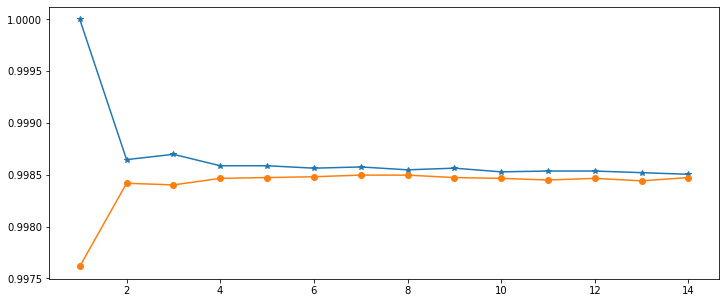

In [168]:
plt.figure(figsize=(12,5))
plt.plot(range(1,15),train_scores,marker='*',label='Train Score')
plt.plot(range(1,15),test_scores,marker='o',label='Test Score')

In [117]:
from sklearn.neighbors import KNeighborsClassifier
# From the above, the best KNN is at k=8
#Setup a knn classifier with k neighbors
best_knn = KNeighborsClassifier(8)

### KNN without SMOTE

In [118]:
# Fit the KNN model with training data and score the test data

best_knn.fit(X_train_scaled,y_train)
best_knn.score(X_test_scaled,y_test)

0.9984968914771386

In [119]:
import pickle
# save the model to disk
filename = 'best_knn_without_smote.sav'
pickle.dump(best_knn, open(filename, 'wb'))

In [ ]:
# load the model from disk, NO NEED TO RUN IF NOT NECESSARY
knn_loaded_model = pickle.load(open(filename, 'rb'))
#result = knn_loaded_model.score(X_test, y_test)
#print(result)

In [120]:
y_pred = best_knn.predict(X_test_scaled)
# Score for Best KNN, No SMOTE
print("Training set score: {:.3f}".format(best_knn.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(best_knn.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

Training set score: 0.999
Test set score: 0.998
Accuracy:  0.9984968914771386
[[126868      6]
 [   185     11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126874
           1       0.65      0.06      0.10       196

    accuracy                           1.00    127070
   macro avg       0.82      0.53      0.55    127070
weighted avg       1.00      1.00      1.00    127070



### KNN With SMOTE

#### KNN With SMOTE ss=0.1

In [121]:
# Fit the KNN model with training data and score the test data
best_knn.fit(X_train_scaled_ss_01,y_train_scaled_ss_01)
#best_knn.score(X_test_scaled,y_test)

KNeighborsClassifier(n_neighbors=8)

In [122]:
# save the model to disk
filename = 'best_knn_with_smote_ss_01.sav'
pickle.dump(best_knn, open(filename, 'wb'))

In [ ]:
# load the model from disk
knn_loaded_model = pickle.load(open(filename, 'rb'))
#result = knn_loaded_model.score(X_test, y_test)
#print(result)

In [123]:
y_pred = best_knn.predict(X_test_scaled)
# Score for Best KNN, with SMOTE
print("Training set score: {:.3f}".format(best_knn.score(X_train_scaled_ss_01, y_train_scaled_ss_01)))
print("Test set score: {:.3f}".format(best_knn.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

Training set score: 0.991
Test set score: 0.985
Accuracy:  0.9850869599433383
[[125110   1764]
 [   131     65]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    126874
           1       0.04      0.33      0.06       196

    accuracy                           0.99    127070
   macro avg       0.52      0.66      0.53    127070
weighted avg       1.00      0.99      0.99    127070



#### KNN With SMOTE ss=0.5

In [124]:
# Fit the KNN model with training data and score the test data
best_knn.fit(X_train_scaled_ss_05,y_train_scaled_ss_05)
#best_knn.score(X_test_scaled,y_test)

KNeighborsClassifier(n_neighbors=8)

In [125]:
# save the model to disk
filename = 'best_knn_with_smote_ss_05.sav'
pickle.dump(best_knn, open(filename, 'wb'))

In [ ]:
# load the model from disk
knn_loaded_model = pickle.load(open(filename, 'rb'))
#result = knn_loaded_model.score(X_test, y_test)
#print(result)

In [126]:
y_pred = best_knn.predict(X_test_scaled)
# Score for Best KNN, with SMOTE
print("Training set score: {:.3f}".format(best_knn.score(X_train_scaled_ss_05, y_train_scaled_ss_05)))
print("Test set score: {:.3f}".format(best_knn.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

Training set score: 0.991
Test set score: 0.980
Accuracy:  0.9802156291807665
[[124485   2389]
 [   125     71]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    126874
           1       0.03      0.36      0.05       196

    accuracy                           0.98    127070
   macro avg       0.51      0.67      0.52    127070
weighted avg       1.00      0.98      0.99    127070



#### KNN With SMOTE ss=1.0

In [127]:
# Fit the KNN model with training data and score the test data
best_knn.fit(X_train_scaled_ss_10,y_train_scaled_ss_10)
#best_knn.score(X_test_scaled,y_test)

KNeighborsClassifier(n_neighbors=8)

In [128]:
# save the model to disk
filename = 'best_knn_with_smote_ss_10.sav'
pickle.dump(best_knn, open(filename, 'wb'))

In [ ]:
# load the model from disk
knn_loaded_model = pickle.load(open(filename, 'rb'))
#result = knn_loaded_model.score(X_test, y_test)
#print(result)

In [129]:
y_pred = best_knn.predict(X_test_scaled)
# Score for Best KNN, with SMOTE
print("Training set score: {:.3f}".format(best_knn.score(X_train_scaled_ss_10, y_train_scaled_ss_10)))
print("Test set score: {:.3f}".format(best_knn.score(X_test_scaled, y_test)))

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

Training set score: 0.993
Test set score: 0.980
Accuracy:  0.9798536239867789
[[124439   2435]
 [   125     71]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    126874
           1       0.03      0.36      0.05       196

    accuracy                           0.98    127070
   macro avg       0.51      0.67      0.52    127070
weighted avg       1.00      0.98      0.99    127070

